<a href="https://colab.research.google.com/github/21002572uhi/21002572_DataAnalytics/blob/main/21002572_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction

The required task was to analyse the relationships between the weather and the number of traffic collisions in New York City.

This involved first obtaining and collating the weather and collision data using Big Query. Subsequent steps include initial analysis of all the data and then broken down by year, analysis of the weather factors, analysis by season and day, analysis of date subsets against weather, and analysis of linear relationships.

# 2 Methodology

## 2.1 Collation of data

Big Query was used to obtain and collate publicly available weather data collated by NOAA (2022); the information obtained related solely to New York City (specifically station 725060) from 2012 to 2020. The weather data included 12 weather factors, including temperature, windspeed and precipitation, as well as the dates. The weather tables from each year were merged to created one large weather dataset.

Big Query was then used to look at a dataset of motor vehicle collisions collated by NYPD (2023); the information obtained was for New York City from 2012 to 2020, in which each collision had a timestamp. The numbers of collisions on individual calendar days were obtained, and this was merged with weather data, in order to have a dataset which identified both the weather factors and number of collisions on the calendar days from 2012 to 2020.

This dataset was then reordered by date.





In [139]:
coll <- read.csv("https://raw.githubusercontent.com/21002572uhi/21002572_DataAnalytics/main/collated_collision_data_ordered.csv", stringsAsFactors = TRUE)

The top few and bottom few records can be seen below, followed by the summary. Day, year and mo are the specific parts of the calendar date, while da relates to the day of the week (where Monday is 1, Tuesday is 2, etc). The weather factors are temperature (degrees Fahrenheit), dew point (degrees Fahrenheit), sea level pressure (millibars), visibility (miles), windspeed (knots), maximum sustained windspeed (knots), maximum gust for the day (knots), maximum temperature (degrees Fahrenheit), minimum temperature (degrees Fahrenheit), precipitation (inches), snow depth (inches) and fog (where 1=yes).

In [140]:
head(coll)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 7   2012 7  1  2012-07-01     83.6 63.0 1008.9  9.7  4.1   9.9   18.1 93.0
2 1   2012 7  2  2012-07-02     80.3 54.1 1011.6 10.0  3.8  15.0  999.9 88.0
3 2   2012 7  3  2012-07-03     79.8 56.7 1012.8 10.0  2.9  12.0  999.9 88.0
4 3   2012 7  4  2012-07-04     81.8 65.6 1009.1  9.2  3.6  11.1  999.9 91.0
5 4   2012 7  5  2012-07-05     86.7 64.3 1007.4  9.4  3.8  15.0  999.9 93.9
6 5   2012 7  6  2012-07-06     81.9 62.3 1011.7 10.0  3.1   9.9  999.9 91.0
  min  prcp  sndp  fog NUM_COLLISIONS
1 66.0  0.00 999.9 0   538           
2 66.9  0.00 999.9 0   564           
3 63.0  0.00 999.9 0   664           
4 68.0  0.06 999.9 0   432           
5 70.0 99.99 999.9 0   591           
6 66.9  0.00 999.9 0   638

In [141]:
tail(coll)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
3101 6   2020 12 26 2020-12-26     40.1 29.4 1008.2  8.8  19.7 27.0   35.9 59.0
3102 7   2020 12 27 2020-12-27     34.2 21.2 1021.2 10.0   7.7 15.0   22.0 44.1
3103 1   2020 12 28 2020-12-28     43.0 36.2 1024.8 10.0   9.5 14.0  999.9 52.0
3104 2   2020 12 29 2020-12-29     41.3 26.2 1022.0  9.7  13.0 19.0   28.0 52.0
3105 3   2020 12 30 2020-12-30     34.1 17.0 1029.9 10.0  11.0 19.0   24.1 48.0
3106 4   2020 12 31 2020-12-31     48.8 43.9 1018.7  8.4  14.6 24.1   29.9 53.6
     min  prcp sndp  fog NUM_COLLISIONS
3101 34.0 1.18 999.9 0   226           
3102 28.9 0.00 999.9 0   184           
3103 26.1 0.00 999.9 0   217           
3104 32.0 0.00 999.9 0   244           
3105 25.0 0.00 999.9 0   238           
3106 43.0 0.03 999.9 0   278

In [142]:
summary(coll)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp               slp       
 2012-07-01:   1   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 2012-07-02:   1   1st Qu.:41.20   1st Qu.:   32.60   1st Qu.: 1012  
 2012-07-03:   1   Median :52.50   Median :   45.70   Median : 1017  
 2012-07-04:   1   Mean   :52.25   Mean   :   47.88   Mean   : 1023  
 2012-07-05:   1   3rd Qu.:64.70   3rd Qu.:   59.10   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :86.70   Max.   : 9999.90   Max.  

# 3 Results

## 3.1 Initial analysis of all data

Initial analysis involved plotting different elements of the weather data against the number of collisions, to begin gaining visual representations of the relationships between the factors.

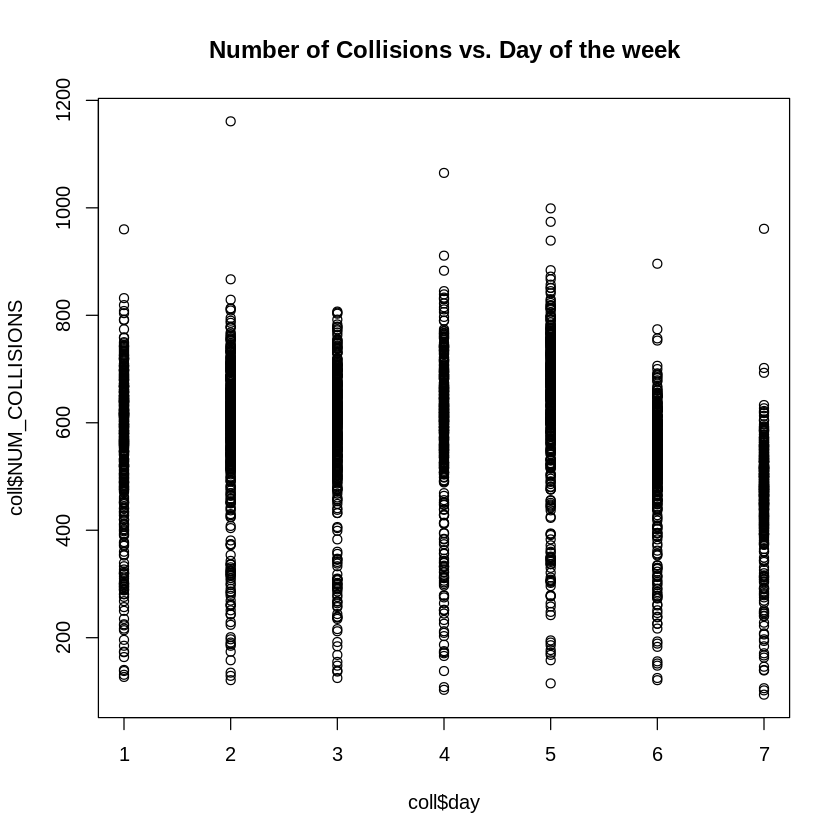

In [143]:
plot(coll$day, coll$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week")

From the plot above, it appears that collision numbers increase through the weekdays, being highest on Fridays on average. Collision numbers appear lower on Saturdays than during the week, and lower still on Sundays.

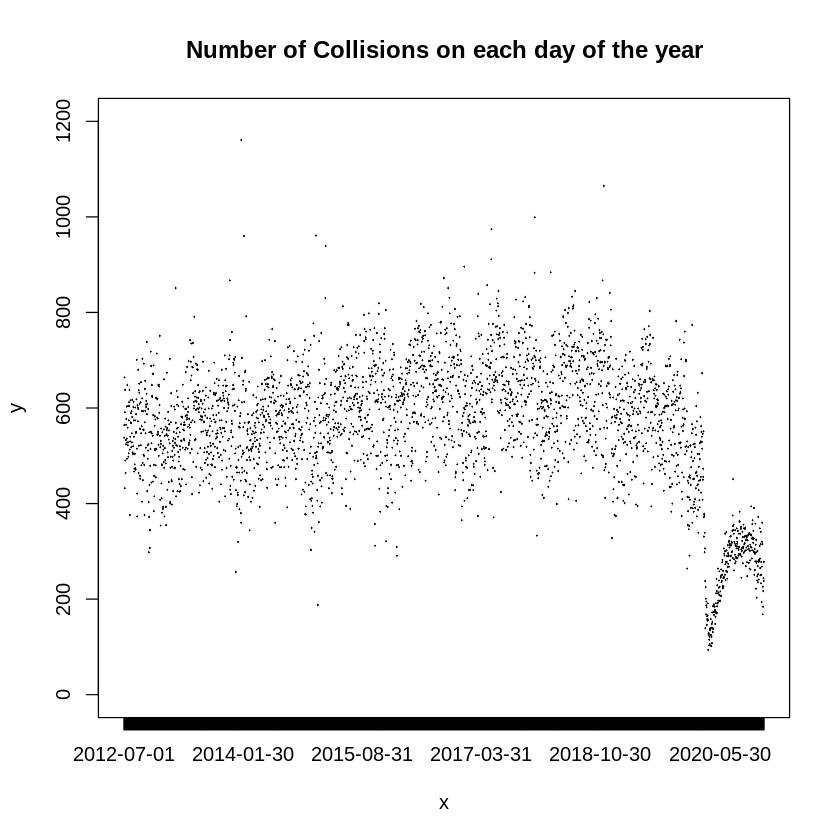

In [144]:
# plotting from 2012 to 2020 - substantial fall in collisions in 2020 (Covid)
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of the year", ylim=c(0,1200))

The plot above shows the collision numbers against date for the whole data set. It appears that there may be repeated patterns across the years, excluding 2020. It also appears that the numbers are increasing somewhat with each year, from 2012 to 2018. 2019 appears lower, and there is a sharp decrease in 2020.

## 3.2 Initial analysis broken down by year

It was noted that when the datasets were collated, there was missing collision data for the first half of 2012, but July to December 2012 were complete. The collision records against each of the years were identified (having run and noted coll$collision_date[0:184], for example) and recorded as:

* 0:184 is 2012 (latter half of year)
* 185:549 is 2013
* 550:914 is 2014
* 915:1279 is 2015
* 1280:1645 is 2016
* 1646:2010 is 2017
* 2011:2375 is 2018
* 2376:2740 is 2019
* 2741:3106 is 2020


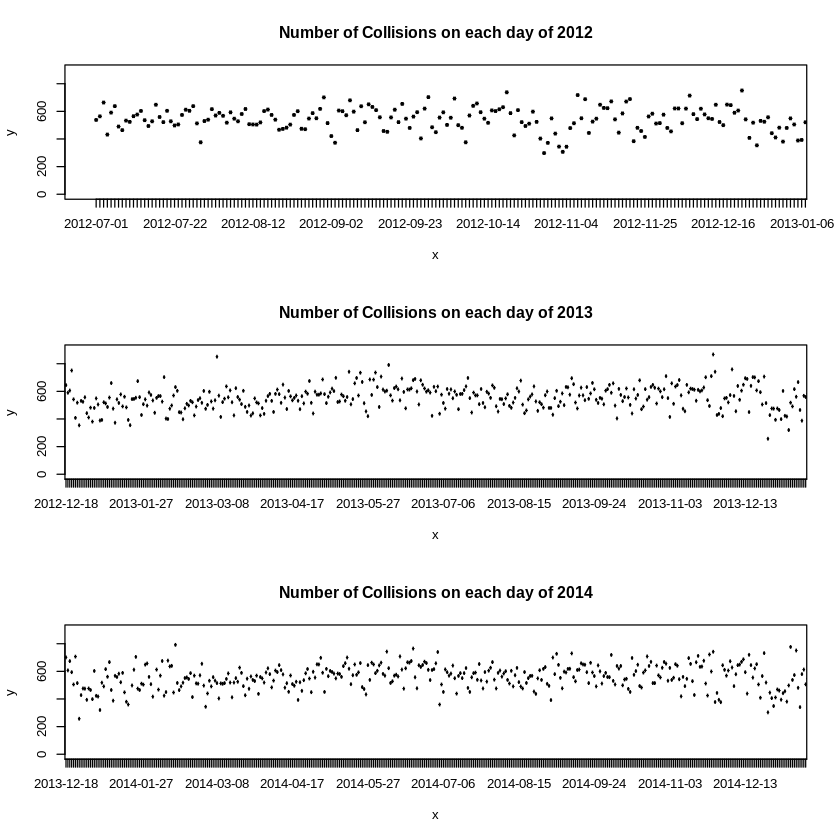

In [145]:
par(mfrow = c(3, 1))

plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2012", xlim=c(0,184), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2013", xlim=c(185,549), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2014", xlim=c(550,914), ylim=c(0,900))

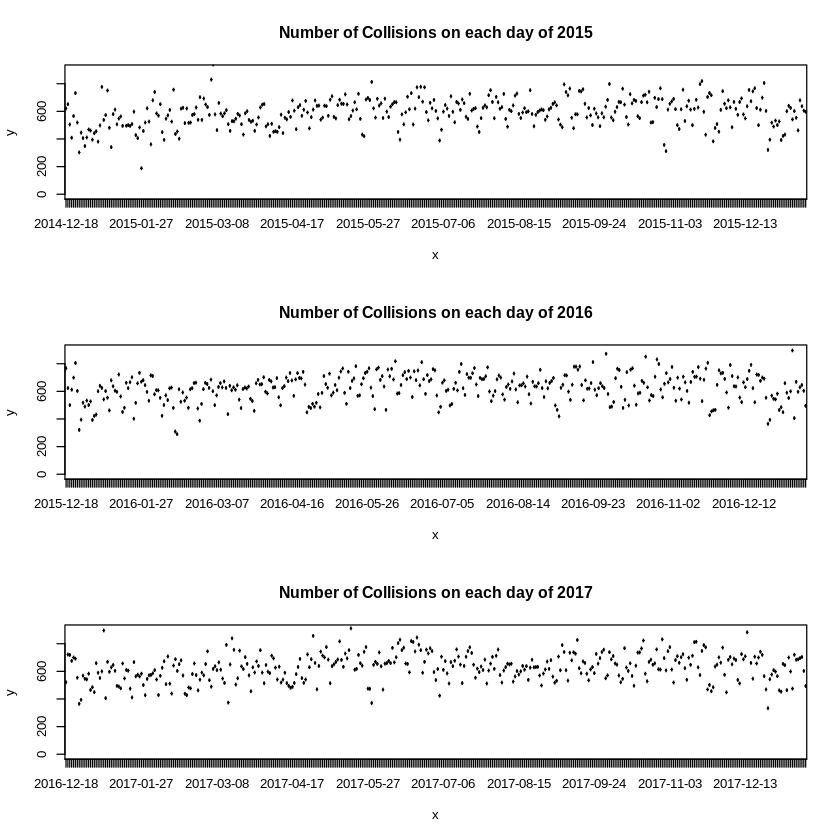

In [146]:
par(mfrow = c(3, 1))

plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2015", xlim=c(915,1279), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2016", xlim=c(1280,1645), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2017", xlim=c(1646,2010), ylim=c(0,900))

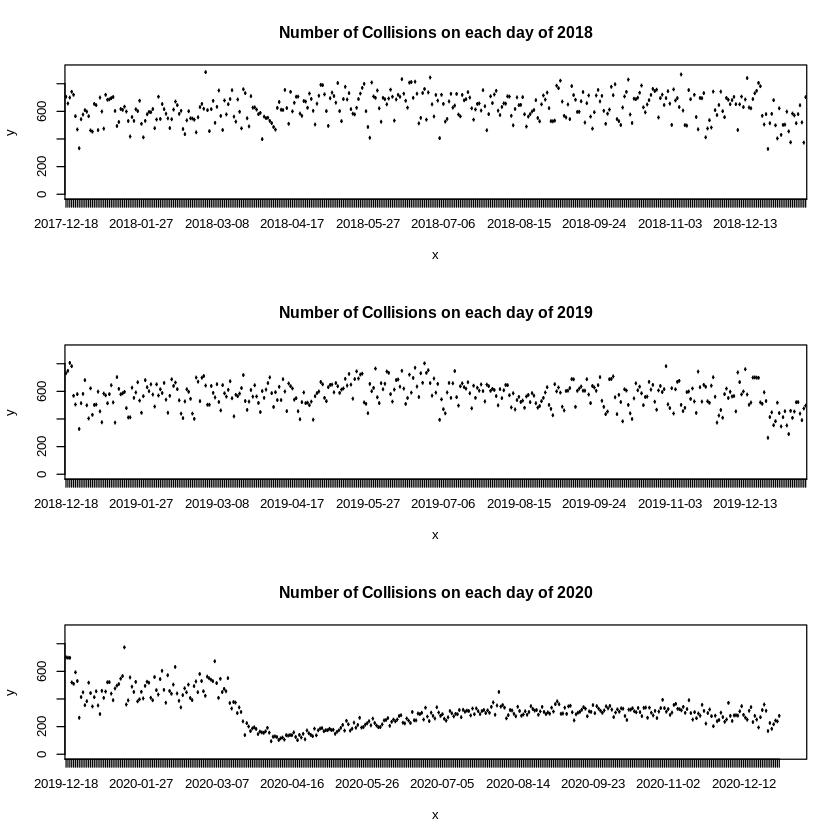

In [147]:
par(mfrow = c(3, 1))

plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2018", xlim=c(2011,2375), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2019", xlim=c(2376,2740), ylim=c(0,900))
plot(coll$collision_date, coll$NUM_COLLISIONS, main="Number of Collisions on each day of 2020", xlim=c(2741,3106), ylim=c(0,900))

The separate annual plots above (ignoring 2020) allow some seasonal patterns or shifts to be identified. For example, in some of the years, there appears to be a great deal of variability in collision numbers in January/February, and in all of the years there appears to be a drop in collisions in December.

## 3.3 Analysis of weather factors

The next step was to get a picture of how the different weather factors were impacting on collision numbers, by plotting a visual representation for a single typical year (usually 2013) and then considering the correlations. Correlations were looked at across the whole dataset, and also for the year that had been plotted, just to see if 2020 data was causing a deviation in the correlations.

In [148]:
library(lattice)

### 3.3.1 Temperature

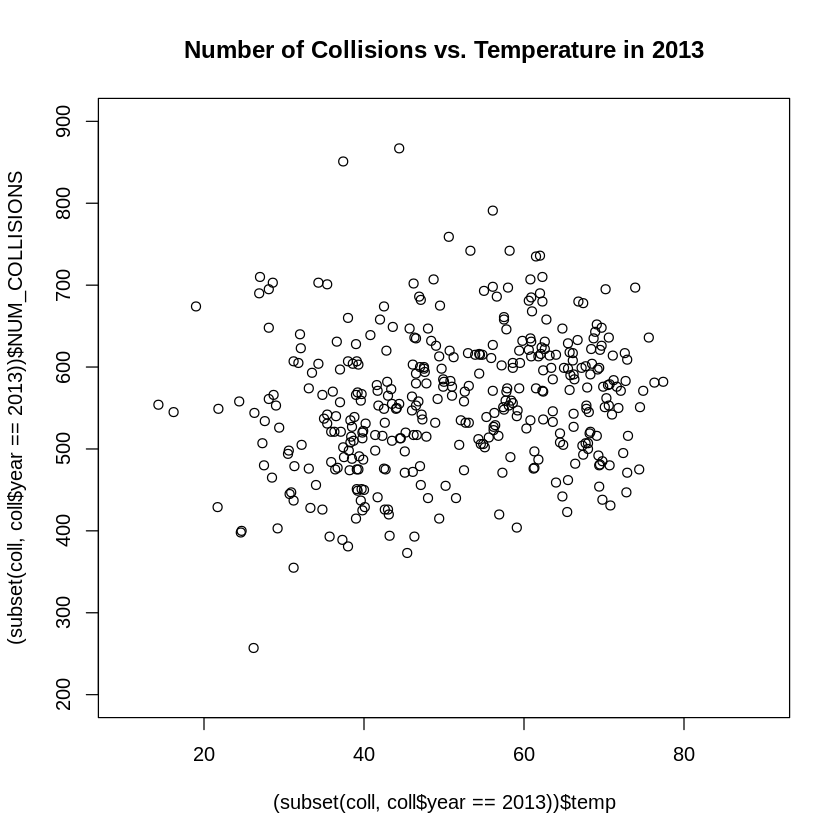

In [149]:
plot(
  (subset(coll, coll$year == 2013))$temp,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Temperature in 2013",
  xlim=c(10,90), ylim=c(200,900)
  )

The plot above appears to show a small positive relationship between temperature and collisions.



In [150]:
# correlation between temperature and number of collisions
cor(
  (subset(coll, coll$temp != 9999.9))$temp,
  (subset(coll, coll$temp != 9999.9))$NUM_COLLISIONS
  )

[1] 0.0749743

There is a very small positive correlation between temperature and collision numbers across the whole dataset, so it would be useful to look at correlations by year.

In [151]:
# correlation between temperature and number of collisions in 2012
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2012))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2013
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2013))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2014
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2014))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2015
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2015))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2016
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2016))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2017
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2017))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2018
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2018))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2019
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2019))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between temperature and number of collisions in 2020
cor(
  (subset(coll, coll$temp != 9999.9 & coll$year == 2020))$temp,
  (subset(coll, coll$temp != 9999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.1004133

[1] 0.1983205

[1] 0.1577755

[1] 0.2482423

[1] 0.2648438

[1] 0.2073396

[1] 0.2273642

[1] 0.1329058

[1] -0.2169309

There is a positive correlation between temperature and collision numbers in each year from 2012 to 2019, each of which is greater than the overall correlation. It is apparent that 2020, which shows a negative correlation, is impacting on the overall figure. The positive correlations are highest in 2015 and 2016.

### 3.3.2 Dew point

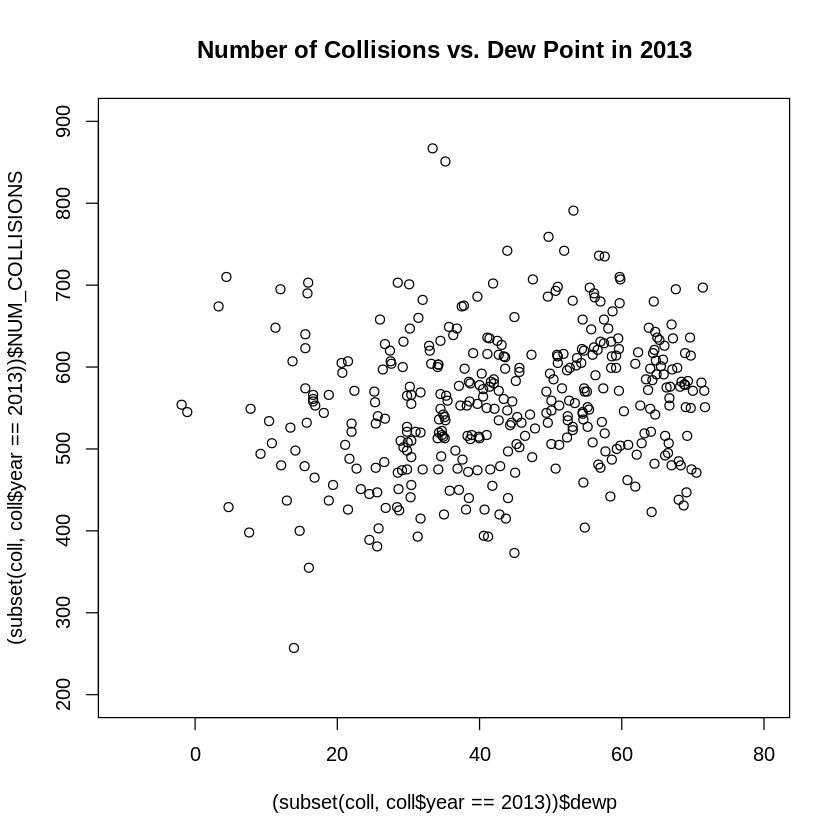

In [152]:
plot(
  (subset(coll, coll$year == 2013))$dewp,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Dew Point in 2013",
  xlim=c(-10,80), ylim=c(200,900)
  )

In the plot above, it appears that there may be a small positive relationship between dew point and collision numbers.

In [153]:
# a smaller positive correlation between dew point and number of collisions in all years
cor(
  (subset(coll, coll$dewp != 9999.9))$dewp,
  (subset(coll, coll$dewp != 9999.9))$NUM_COLLISIONS
  )

[1] 0.08330885

There is a very small positive correlation between dew point and collision numbers across the whole dataset, so again it would be useful to look at correlations by year.

In [154]:
# correlation between dew point and number of collisions in 2012
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2012))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2013
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2013))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2014
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2014))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2015
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2015))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2016
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2016))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2017
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2017))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2018
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2018))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2019
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2019))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between dew point and number of collisions in 2020
cor(
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2020))$dewp,
  (subset(coll, coll$dewp != 9999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.09382395

[1] 0.1892756

[1] 0.1430246

[1] 0.2426074

[1] 0.2474133

[1] 0.1874803

[1] 0.2165141

[1] 0.1143357

[1] -0.1775097

The correlations by year between dew point and collision numbers are quite mixed. All are positive except 2020, but there is some variability with 2012 showing the lowest correlation at 0.094 and 2016 the highest at 0.247.

### 3.3.3 Sea level pressure

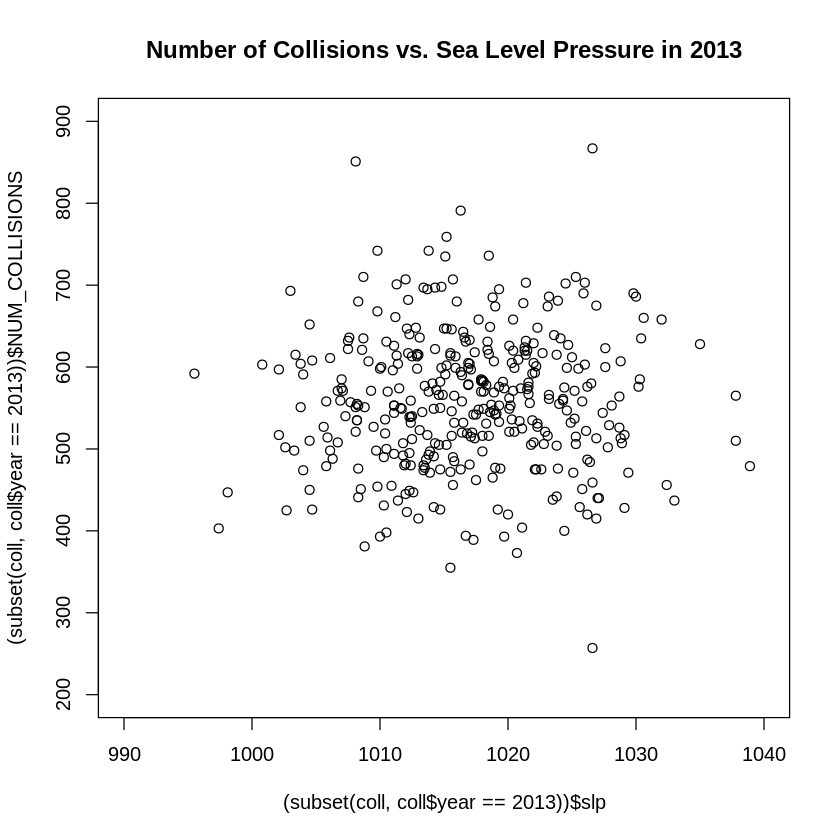

In [155]:
plot(
  (subset(coll, coll$year == 2013))$slp,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Sea Level Pressure in 2013",
  xlim=c(990,1040), ylim=c(200,900)
  )

From the plot above, it doesn't appear that there is a relationship between sea level pressure and the number of collisions.

In [156]:
# correlation between sea level pressure and number of collisions in all years
cor(
  (subset(coll, coll$slp != 9999.9))$slp,
  (subset(coll, coll$slp != 9999.9))$NUM_COLLISIONS
  )

[1] -0.01664528

The correlation between sea level pressure and collision numbers across the whole dataset is almost zero. Nevertheless, it would be worth looking at it broken down by year.

In [157]:
# correlation between sea level pressure and number of collisions in 2012
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2012))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2013
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2013))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2014
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2014))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2015
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2015))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2016
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2016))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2017
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2017))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2018
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2018))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2019
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2019))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between sea level pressure and number of collisions in 2020
cor(
  (subset(coll, coll$slp != 9999.9 & coll$year == 2020))$slp,
  (subset(coll, coll$slp != 9999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.1006114

[1] 0.0211476

[1] -0.02982472

[1] -0.02710795

[1] -0.02305999

[1] -0.06928943

[1] -0.1536429

[1] -0.1208627

[1] 0.1402767

The correlations in most years are negligible. Sea level pressure can be reasonably disregarded as a factor affecting collision numbers.

### 3.3.4 Visibility

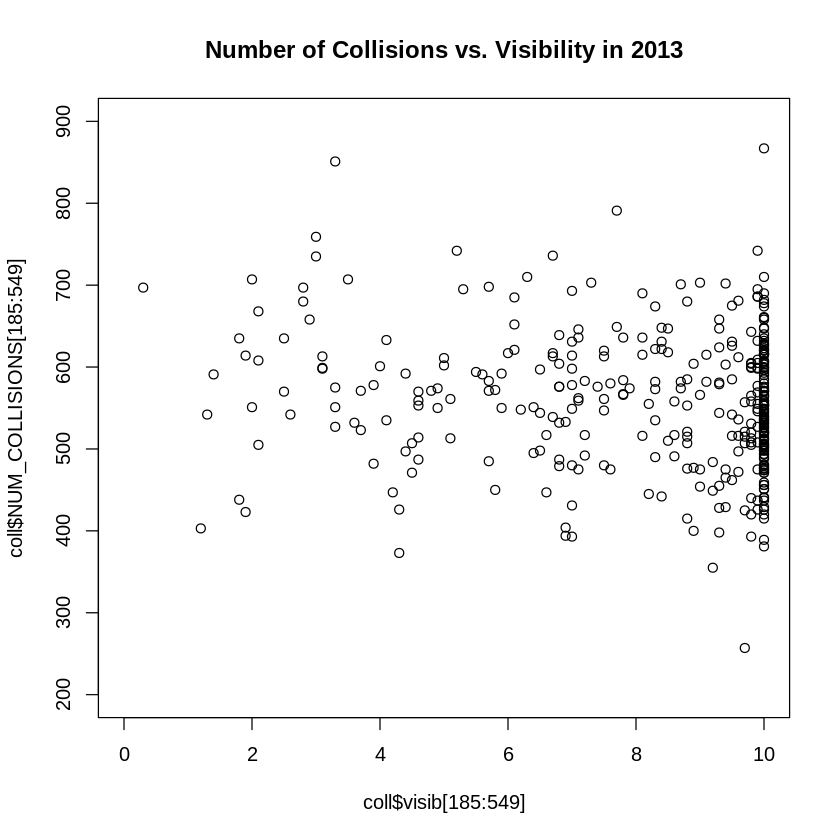

In [158]:
plot(coll$visib[185:549], coll$NUM_COLLISIONS[185:549], main="Number of Collisions vs. Visibility in 2013", xlim=c(0,10), ylim=c(200,900))

The plot above shows the number of collisions against visibility, which is recorded as the mean number of miles of visibility in a day. It can be seen that this is often recorded as the maximum. There is no obvious relationship apparent from the plot.

In [159]:
# a negligible correlation between visibility and number of collisions in all years
cor(
  (subset(coll, coll$visib != 999.9))$visib,
  (subset(coll, coll$visib != 999.9))$NUM_COLLISIONS
  )

[1] -0.03989888

The correlation shows a negligible relationship between visibility and the number of collisions across the whole dataset, which seems a little surprising.

In [160]:
# correlations between visibility and number of collisions in each year
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2012))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2013))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2014))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2015))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2016))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2017))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2018))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2019))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
cor(
  (subset(coll, coll$visib != 999.9 & coll$year == 2020))$visib,
  (subset(coll, coll$visib != 999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] -0.1124835

[1] -0.1466096

[1] -0.05466283

[1] -0.007399972

[1] 0.0112473

[1] -0.07451094

[1] -0.1012178

[1] -0.04950622

[1] -0.0183852

Breaking down the correlations by each year reinforces the lack of relationship between visibility and collision numbers. This factor can be reasonably disregarded.

### 3.3.5 Wind Speed

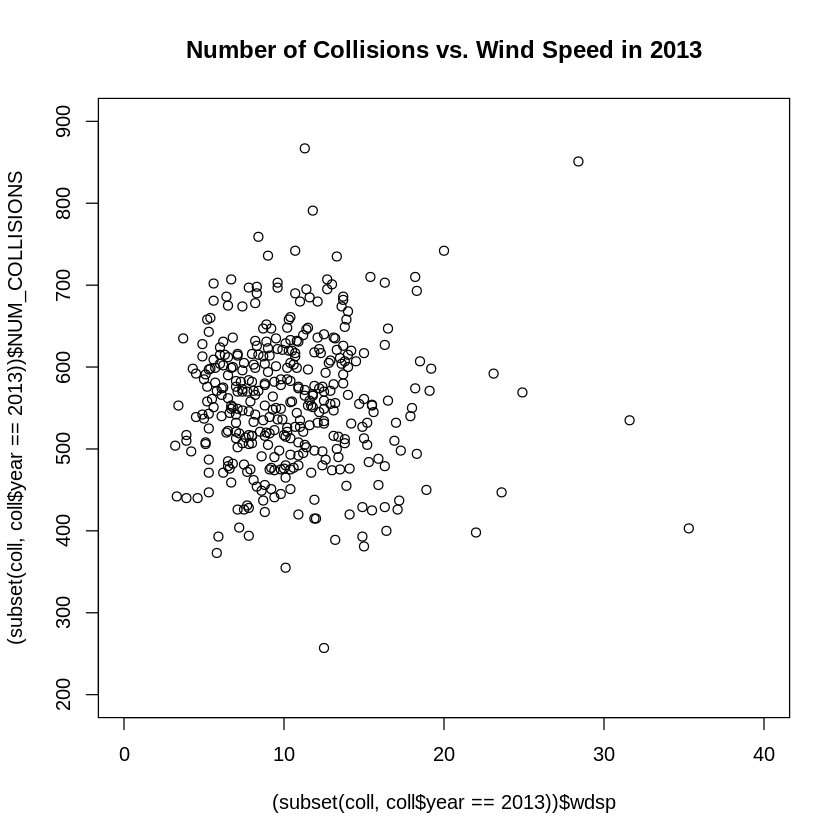

In [161]:
plot(
  (subset(coll, coll$year == 2013))$wdsp,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Wind Speed in 2013",
  xlim=c(0,40), ylim=c(200,900)
  )

The plot above shows collision numbers against the day's mean wind speed in knots. A relationship between the two is not apparent.

In [162]:
# a negligible correlation between windspeed and number of collisions in all years
cor(
  (subset(coll, coll$wdsp != 999.9))$wdsp,
  (subset(coll, coll$wdsp != 999.9))$NUM_COLLISIONS
  )

[1] -0.008035189

The correlation between wind speed and collision numbers across the whole dataset is almost zero. Nevertheless, it would be useful to look at the breakdown by year.

In [163]:
# correlation between windspeed and number of collisions in 2012
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2012))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2013
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2013))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2014
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2014))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2015
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2015))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2016
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2016))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2017
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2017))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2018
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2018))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2019
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2019))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between windspeed and number of collisions in 2020
cor(
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2020))$wdsp,
  (subset(coll, coll$wdsp != 999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] -0.1140553

[1] 0.00100612

[1] -0.03885164

[1] -0.1029442

[1] -0.07836416

[1] 0.00987308

[1] -0.04630042

[1] 0.04430334

[1] -0.04975589

The correlations between windspeed and collision numbers in the different years are mixed, but mostly very small. This factor can be reasonably disregarded in terms of its influence on collision numbers.

### 3.3.6 Maximum Sustained Wind Speed

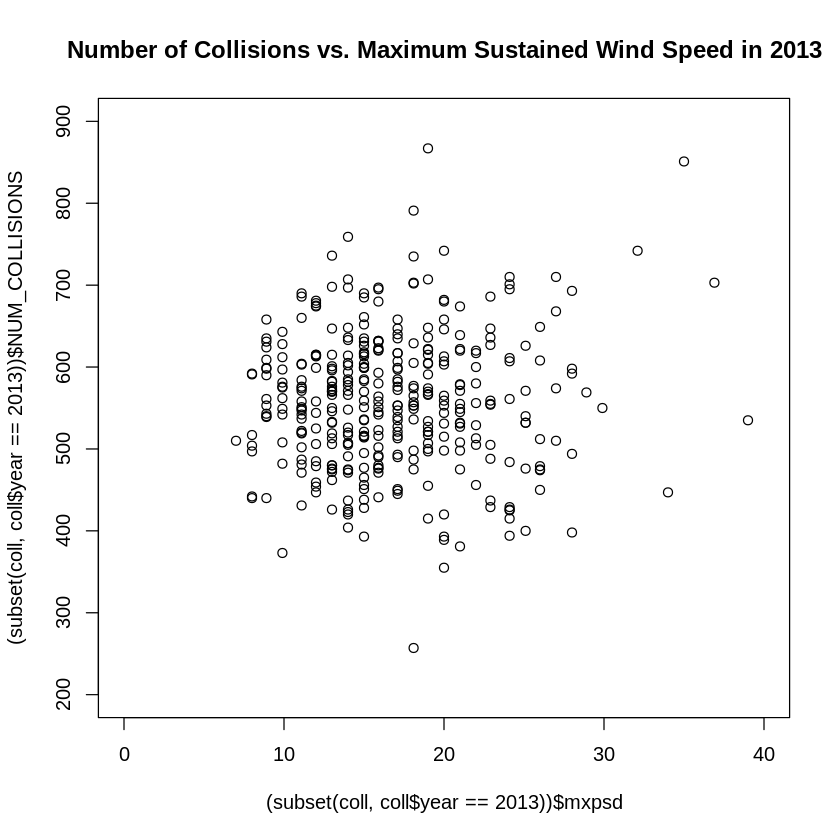

In [164]:
plot(
  (subset(coll, coll$year == 2013))$mxpsd,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Maximum Sustained Wind Speed in 2013",
  xlim=c(0,40), ylim=c(200,900)
  )

Above is the plot of collision numbers against the maximum sustained windspeed in knots. There is no immediate indication of a relationship, which is unsurprising given that windspeed was a negligible factor.

In [165]:
# a negligible correlation between maximum sustained windspeed and number of collisions in all years
cor(
  (subset(coll, coll$mxpsd != 999.9))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9))$NUM_COLLISIONS
  )

[1] -0.01770938

There is a very small negative correlation between maximum windspeed and collision numbers across the whole dataset.

In [166]:
# correlation between maximum sustained windspeed and number of collisions in 2012
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2012))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2013
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2013))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2014
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2014))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2015
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2015))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2016
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2016))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2017
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2017))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2018
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2018))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2019
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2019))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between maximum sustained windspeed and number of collisions in 2020
cor(
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2020))$mxpsd,
  (subset(coll, coll$mxpsd != 999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.02269272

[1] 0.01118876

[1] -0.0600791

[1] -0.1333291

[1] -0.1167966

[1] -0.02113353

[1] -0.01998143

[1] -0.01635937

[1] -0.01954522

The correlations between maximum sustained windspeed and number of collisions in each year are largely very small, so this factor can be disregarded.

### 3.3.7 Gust

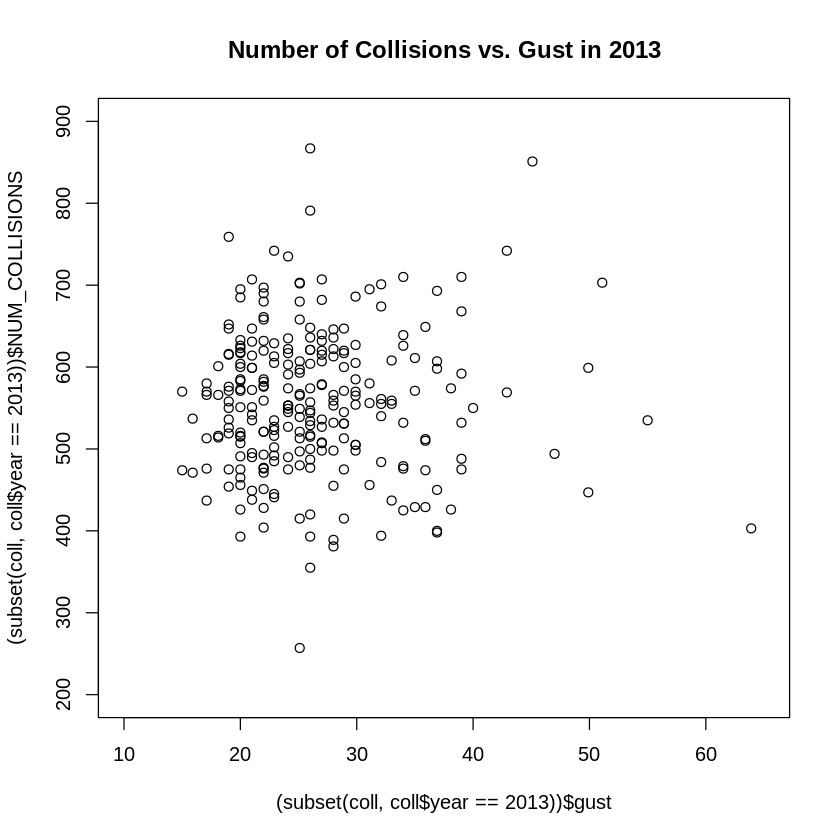

In [167]:
plot(
  (subset(coll, coll$year == 2013))$gust,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Gust in 2013",
  xlim=c(10,65), ylim=c(200,900)
  )

The plot above depicts collision numbers against the maximum wind gust for the day in knots. No relationship between the two is apparent.

In [168]:
# a tiny negative correlation between gust and number of collisions in all years
cor(
  (subset(coll, coll$gust != 999.9))$gust,
  (subset(coll, coll$gust != 999.9))$NUM_COLLISIONS
  )

[1] -0.03896023

There is a small negative correlation between collision numbers and maximum wind gust across the whole dataset.

In [169]:
# correlation between gust and number of collisions in 2012
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2012))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2013
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2013))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2014
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2014))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2015
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2015))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2016
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2016))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2017
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2017))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2018
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2018))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2019
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2019))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between gust and number of collisions in 2020
cor(
  (subset(coll, coll$gust != 999.9 & coll$year == 2020))$gust,
  (subset(coll, coll$gust != 999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] -0.02145168

[1] 0.002168043

[1] -0.0364095

[1] -0.1501422

[1] -0.1679517

[1] -0.07504922

[1] 0.02098237

[1] -0.06973049

[1] 0.02124882

Broken down by year, the correlations between gust and collisions is mixed. 2015 and 2016 show the strongest negative correlations, but some of the others are small.

### 3.3.8 Maximum Temperature

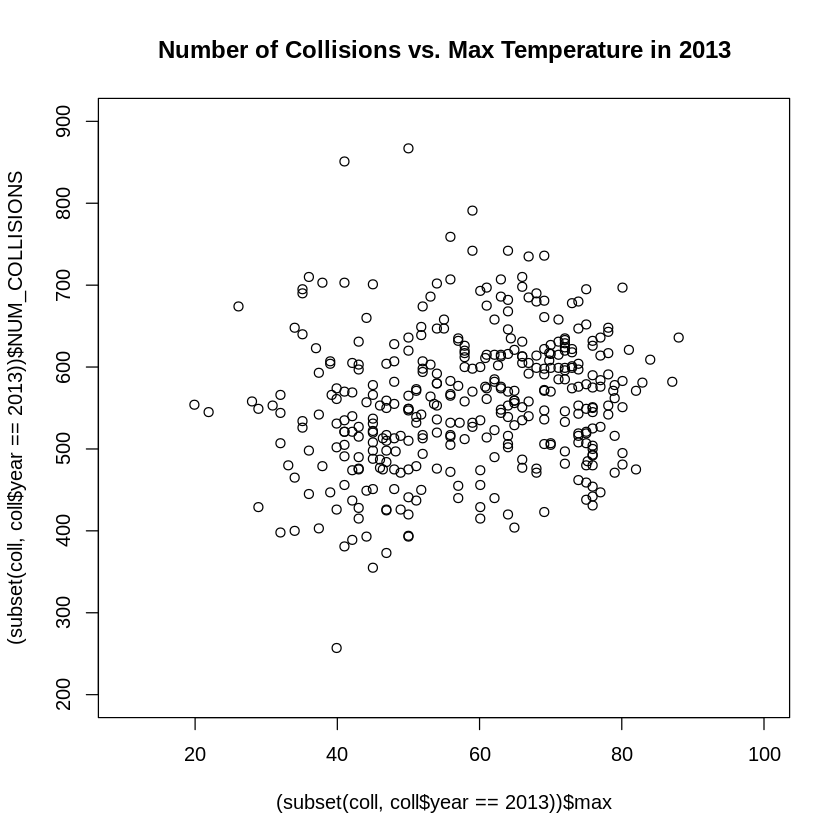

In [170]:
plot(
  (subset(coll, coll$year == 2013))$max,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Max Temperature in 2013",
  xlim=c(10,100), ylim=c(200,900)
  )

Above is the plot of collision numbers against maximum temperature in 2013. It appears that there may be a slight positive relationship between the two.

In [171]:
# a small positive correlation between max temperature and number of collisions in all years
cor(
  (subset(coll, coll$max != 9999.9))$max,
  (subset(coll, coll$max != 9999.9))$NUM_COLLISIONS
  )

[1] 0.08158365

When considering all years, there is a small positive correlation between maximum temperature and collision numbers.

In [172]:
# a small positive correlation between max temperature and number of collisions in 2012
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2012))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2013
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2013))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2014
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2014))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2015
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2015))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2016
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2016))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2017
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2017))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2018
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2018))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2019
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2019))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# a small positive correlation between max temperature and number of collisions in 2020
cor(
  (subset(coll, coll$max != 9999.9 & coll$year == 2020))$max,
  (subset(coll, coll$max != 9999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.1099845

[1] 0.1847576

[1] 0.1780214

[1] 0.2520379

[1] 0.2569682

[1] 0.1881306

[1] 0.2257913

[1] 0.1164604

[1] -0.2177226

The correlations between maximum temperature are consistently positive, if 2020 is ignored. This is a promising factor, with the correlations strongest in 2015, 2016 and 2018.

### 3.3.9 Minimum Temperature

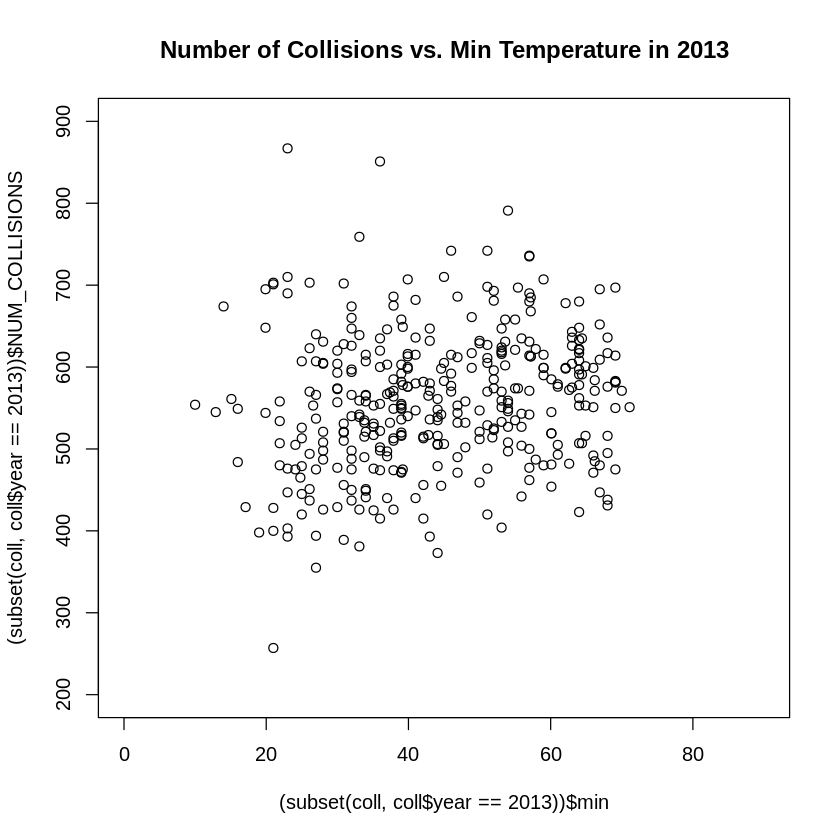

In [173]:
plot(
  (subset(coll, coll$year == 2013))$min,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Min Temperature in 2013",
  xlim=c(0,90), ylim=c(200,900)
  )

Above is the plot of collision numbers against minimum temperature in Fahrenheit in 2013. It looks as though there may be a small positive relationship between the two.

In [174]:
# correlation between min temperature and number of collisions in all years
cor(
  (subset(coll, coll$min != 9999.9))$min,
  (subset(coll, coll$min != 9999.9))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in all years
cor(
  (subset(coll, coll$min != 9999.9 & coll$year !=2020))$min,
  (subset(coll, coll$min != 9999.9 & coll$year !=2020))$NUM_COLLISIONS
  )

[1] 0.06899679

[1] 0.1693565

There is a small positive correlation between minimum temperature and collision numbers across all years. The positive correlation is larger when 2020 is excluded.

In [175]:
# correlation between min temperature and number of collisions in 2012
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2012))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2013
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2013))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2014
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2014))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2015
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2015))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2016
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2016))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2017
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2017))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2018
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2018))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2019
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2019))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between min temperature and number of collisions in 2020
cor(
  (subset(coll, coll$min != 9999.9 & coll$year == 2020))$min,
  (subset(coll, coll$min != 9999.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.06080194

[1] 0.1803639

[1] 0.1729896

[1] 0.2328649

[1] 0.25261

[1] 0.2204531

[1] 0.2193718

[1] 0.1361838

[1] -0.1970729

When looking at the correlations by year, there is a sound positive relationship between minimum temperature and collision numbers. Only 2020 has a negative relationship, which was distorting the overall correlation when 2020 was included.

### 3.3.10 Precipitation

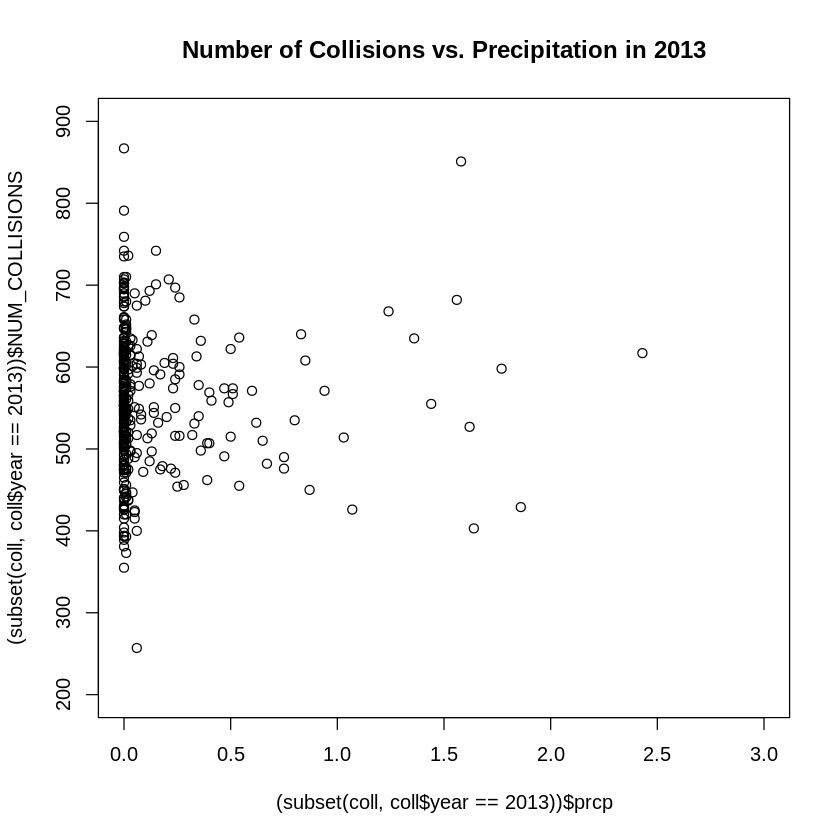

In [176]:
plot(
  (subset(coll, coll$year == 2013))$prcp,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Precipitation in 2013",
  xlim=c(0,3), ylim=c(200,900)
  )

The above plot shows the number of collisions against daily precipitation in inches, for 2013. It can be seen that there is often no precipitation. No relationship between the two is apparent.

In [177]:
# correlation between precipitation and number of collisions in all years
cor(
  (subset(coll, coll$prcp != 99.9))$prcp,
  (subset(coll, coll$prcp != 99.9))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in all years except 2020
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year != 2020))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year != 2020))$NUM_COLLISIONS
  )

[1] -0.01812369

[1] 0.0006932543

The correlation between precipitation and collision numbers across all years is very small, and even smaller when 2020 is excluded.

In [178]:
# correlation between precipitation and number of collisions in 2012
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2012))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2013
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2013))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2014
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2014))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2015
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2015))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2016
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2016))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2017
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2017))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2018
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2018))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2019
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2019))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between precipitation and number of collisions in 2020
cor(
  (subset(coll, coll$prcp != 99.9 & coll$year == 2020))$prcp,
  (subset(coll, coll$prcp != 99.9 & coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.03558313

[1] -0.05007386

[1] 0.02342015

[1] 0.05184697

[1] -0.003438677

[1] 0.06933051

[1] -0.01305439

[1] -0.01689609

[1] 0.03834702

The correlations by year between precipation and collision numbers are very small and a mix of positive and negative correlations. This is not a useful factor to be considered.

### 3.3.10 Snow depth

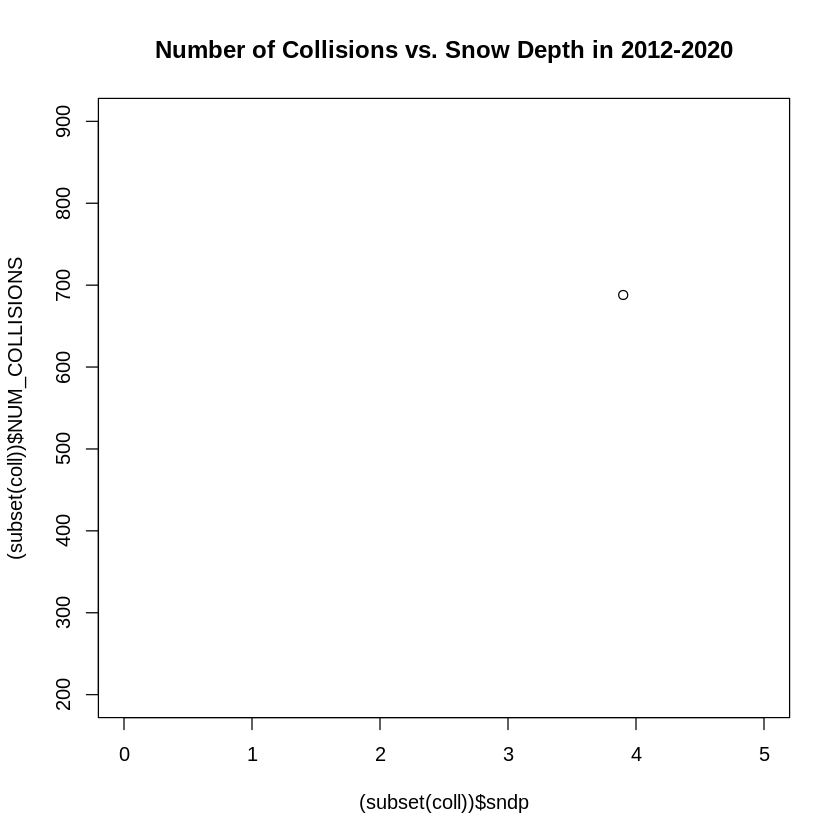

In [179]:
# Snow depth recorded only once in 2012-2020, so disregard
plot(
  (subset(coll))$sndp,
  (subset(coll))$NUM_COLLISIONS,
  main="Number of Collisions vs. Snow Depth in 2012-2020",
  xlim=c(0,5), ylim=c(200,900)
  )

It appears that snow depth was recorded only once in the whole time period being considered, so this is not a factor which can be used.

### 3.3.11 Fog

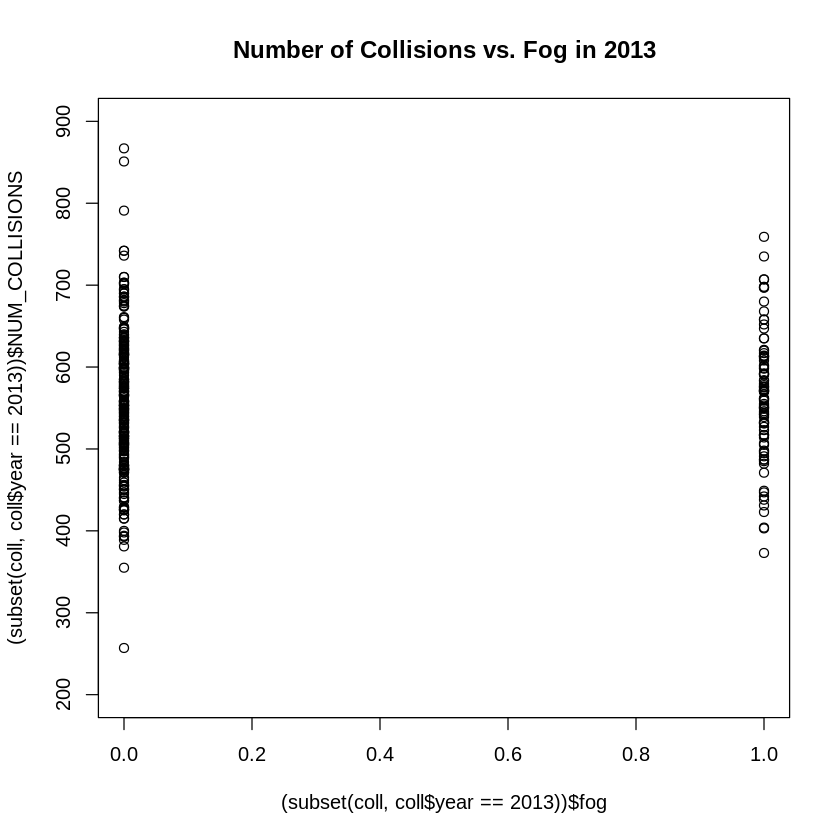

In [180]:
plot(
  (subset(coll, coll$year == 2013))$fog,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS,
  main="Number of Collisions vs. Fog in 2013",
  xlim=c(0,1), ylim=c(200,900)
  )

Above is a plot of collision against records of fog in 2013. Fog is recorded as either present or absent (1.0 or 0.0) and so the usefulness of the plot is limited.

In [181]:
# correlation between fog and number of collisions in all years
cor(coll$fog, coll$NUM_COLLISIONS)
# correlation between fog and number of collisions in all years, excluding 2020
cor(
  (subset(coll, coll$year != 2020))$fog,
  (subset(coll, coll$year != 2020))$NUM_COLLISIONS
  )

[1] 0.03252676

[1] 0.08378891

There is a small positive correlation between fog and collision numbers when considering 2012 to 2020. It is larger when 2020 is excluded.

In [182]:
# correlation between fog and number of collisions in 2012
cor(
  (subset(coll, coll$year == 2012))$fog,
  (subset(coll, coll$year == 2012))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2013
cor(
  (subset(coll, coll$year == 2013))$fog,
  (subset(coll, coll$year == 2013))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2014
cor(
  (subset(coll, coll$year == 2014))$fog,
  (subset(coll, coll$year == 2014))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2015
cor(
  (subset(coll, coll$year == 2015))$fog,
  (subset(coll, coll$year == 2015))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2016
cor(
  (subset(coll, coll$year == 2016))$fog,
  (subset(coll, coll$year == 2016))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2017
cor(
  (subset(coll, coll$year == 2017))$fog,
  (subset(coll, coll$year == 2017))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2018
cor(
  (subset(coll, coll$year == 2018))$fog,
  (subset(coll, coll$year == 2018))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2019
cor(
  (subset(coll, coll$year == 2019))$fog,
  (subset(coll, coll$year == 2019))$NUM_COLLISIONS
  )
# correlation between fog and number of collisions in 2020
cor(
  (subset(coll, coll$year == 2020))$fog,
  (subset(coll, coll$year == 2020))$NUM_COLLISIONS
  )

[1] 0.0949741

[1] 0.03857291

[1] 0.07072484

[1] 0.07936783

[1] 0.05408189

[1] 0.07840448

[1] 0.1028139

[1] 0.06989574

[1] 0.1025946

There is a small positive correlation each year between fog and collision numbers.


## 3.4 Analysis by season (date) and day

In [183]:
collis <- read.csv("https://raw.githubusercontent.com/21002572uhi/21002572_DataAnalytics/main/collated_collision_data_ordered.csv", stringsAsFactors = TRUE)

### 3.4.1 Yearly patterns

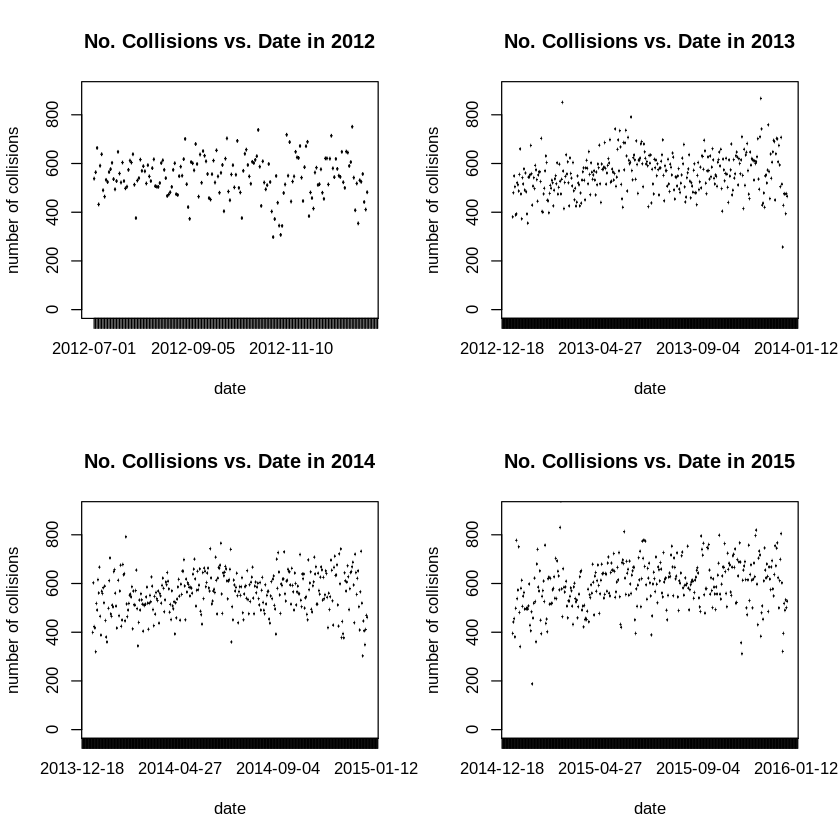

In [184]:
par(mfrow = c(2, 2))

plot(
  (subset(collis, collis$year == 2012))$collision_date,
  (subset(collis, collis$year == 2012))$NUM_COLLISIONS,
  main="No. Collisions vs. Date in 2012",
  xlab="date", ylab="number of collisions",
  xlim=c(0,184), ylim=c(0,900)
  )

plot(
  (subset(collis, collis$year == 2013))$collision_date,
  (subset(collis, collis$year == 2013))$NUM_COLLISIONS,
  main="No. Collisions vs. Date in 2013",
  xlab="date", ylab="number of collisions",
  xlim=c(185,549), ylim=c(0,900)
  )

plot(
  (subset(collis, collis$year == 2014))$collision_date,
  (subset(collis, collis$year == 2014))$NUM_COLLISIONS,
  main="No. Collisions vs. Date in 2014",
  xlab="date", ylab="number of collisions",
  xlim=c(550,914), ylim=c(0,900)
  )

  plot(
  (subset(collis, collis$year == 2015))$collision_date,
  (subset(collis, collis$year == 2015))$NUM_COLLISIONS,
  main="No. Collisions vs. Date in 2015",
  xlab="date", ylab="number of collisions",
  xlim=c(915,1279), ylim=c(0,900)
  )

Above are the plots of collisions on each date across 2012 to 2015. It appears that there may be seasonal trends which repeat. This is more apparent in 2013 and 2014. It also appears that the number of collisions may be slightly rising annually.

In [185]:
summary(
  (subset(collis, collis$year == 2012))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2013))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2014))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2015))$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.0   500.0   548.5   546.4   604.5   751.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   568.0   564.5   623.0  1161.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

The summary information for 2012-2015 supports the impression that collision are increasing annually - this can be seen by looking at the median or mean.

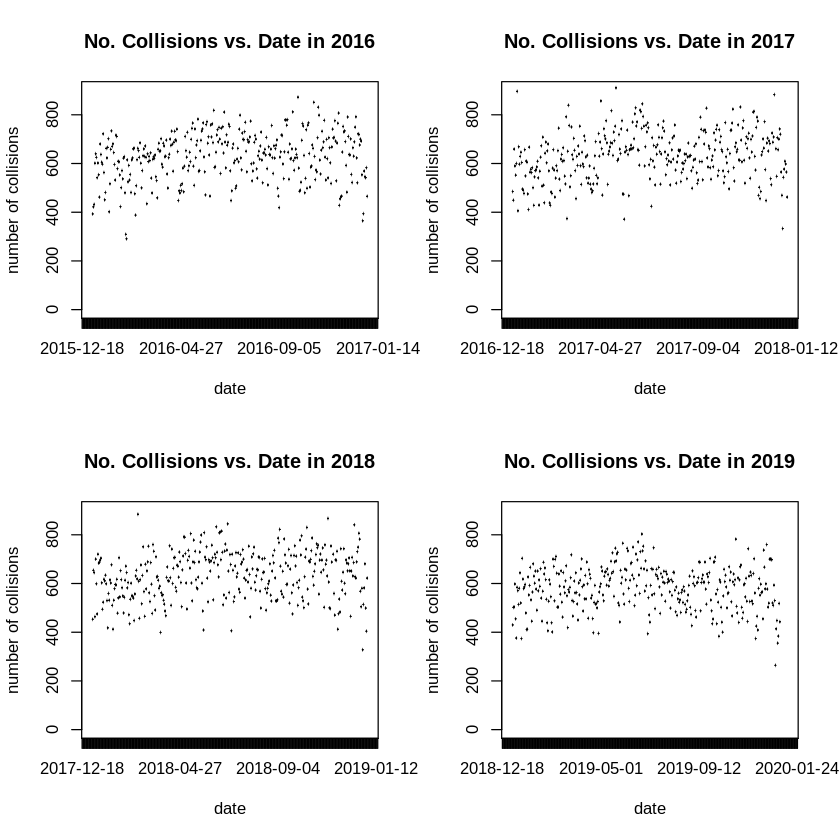

In [186]:
par(mfrow = c(2, 2))

plot(
 (subset(collis, collis$year == 2016))$collision_date,
 (subset(collis, collis$year == 2016))$NUM_COLLISIONS,
 main="No. Collisions vs. Date in 2016",
 xlab="date", ylab="number of collisions",
 xlim=c(1280,1645), ylim=c(0,900)
 )

plot(
 (subset(collis, collis$year == 2017))$collision_date,
 (subset(collis, collis$year == 2017))$NUM_COLLISIONS,
 main="No. Collisions vs. Date in 2017",
 xlab="date", ylab="number of collisions",
 xlim=c(1646,2010), ylim=c(0,900)
 )

plot(
 (subset(collis, collis$year == 2018))$collision_date,
 (subset(collis, collis$year == 2018))$NUM_COLLISIONS,
 main="No. Collisions vs. Date in 2018",
 xlab="date", ylab="number of collisions",
 xlim=c(2011,2375), ylim=c(0,900)
 )

plot(
 (subset(collis, collis$year == 2019))$collision_date,
 (subset(collis, collis$year == 2019))$NUM_COLLISIONS,
 main="No. Collisions vs. Date in 2019",
 xlab="date", ylab="number of collisions",
 xlim=c(2376,2750), ylim=c(0,900)
 )

Above are the plots of collisions on each date across 2015 to 2019. The collision numbers appear to have remained higher than prior years, at least up to 2018. There is an apparent fall in collision numbers in 2019. Again, there appear to be seasonal trends, and some noticeable outliers.

In [187]:
summary(
  (subset(collis, collis$year == 2016))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2017))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2018))$NUM_COLLISIONS)
  summary(
  (subset(collis, collis$year == 2019))$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

The summary information above does show that the median collision numbers continued to increase yearly, before markedly falling in 2019.

### 3.4.2 October/November subset

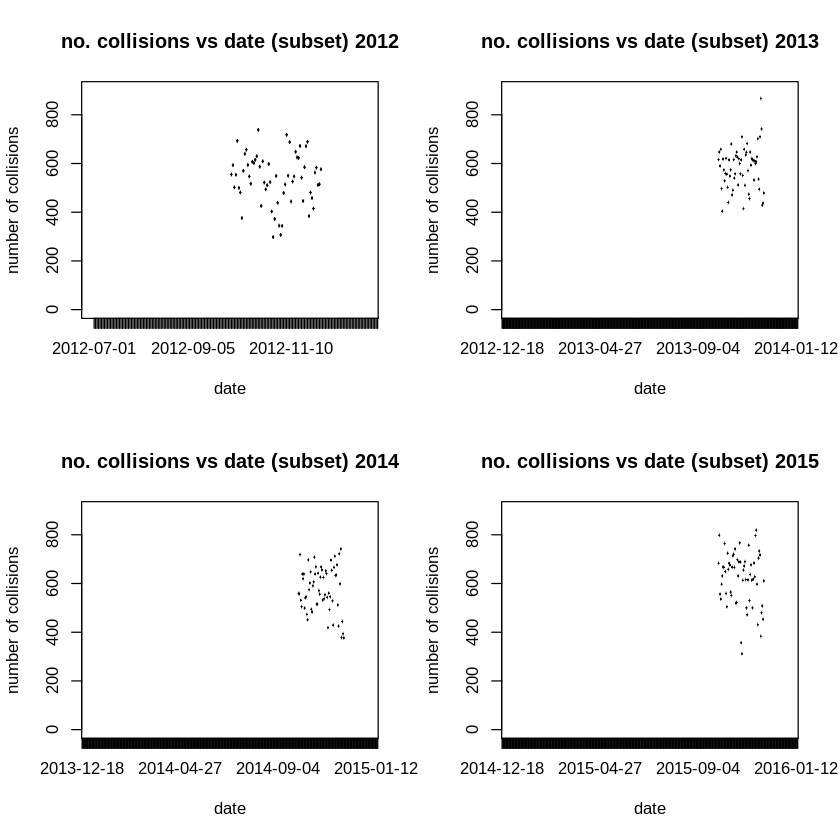

In [188]:
# looking at a subset of dates in a year (1st Oct to 30th Nov), across 4 years
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2012",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(0,184),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2013",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(185,549),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2014",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(550,914),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2015",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(915,1279),
   ylim=c(0,900)
   )

Above are the plots of 2-month October/November subsets only, across 2012-2015, which allow for annual similarities to be seen. 2013 and 2014 are most similar, with more variation and outliers seen in 2015.

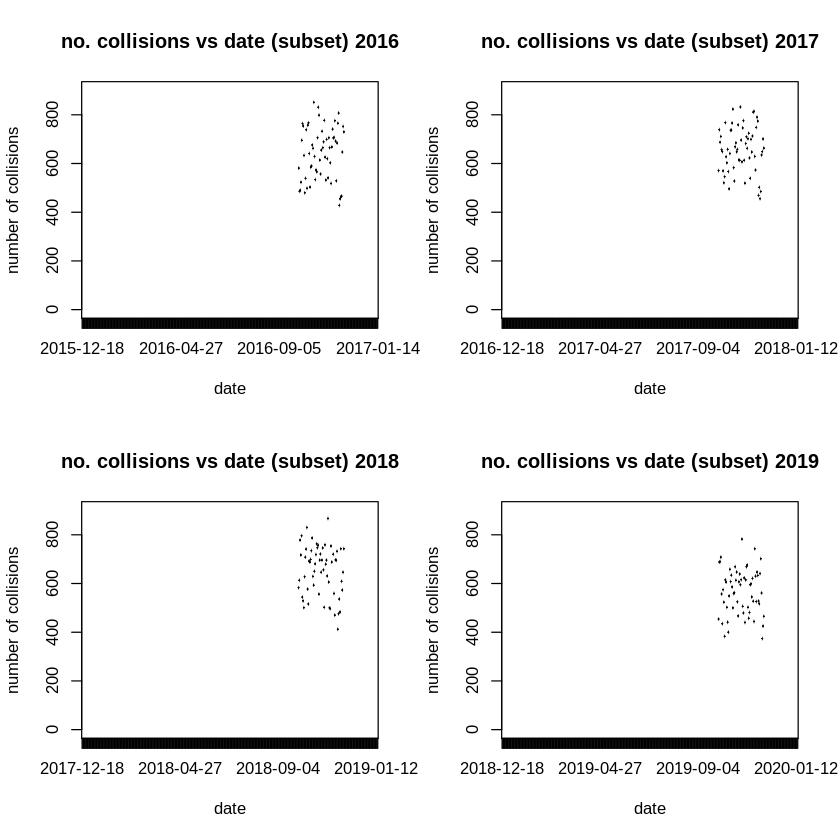

In [189]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2016",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(1280,1645),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2017",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(1646,2010),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2018",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(2011,2375),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$collision_date,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2019",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(2376,2740),
   ylim=c(0,900)
   )

Above are the plots of 2-month October/November subsets only, across 2016-2019. Again, the similarities are apparent, albeit with the pre-noted fall in numbers in 2019.

### 3.4.3 May/June subset

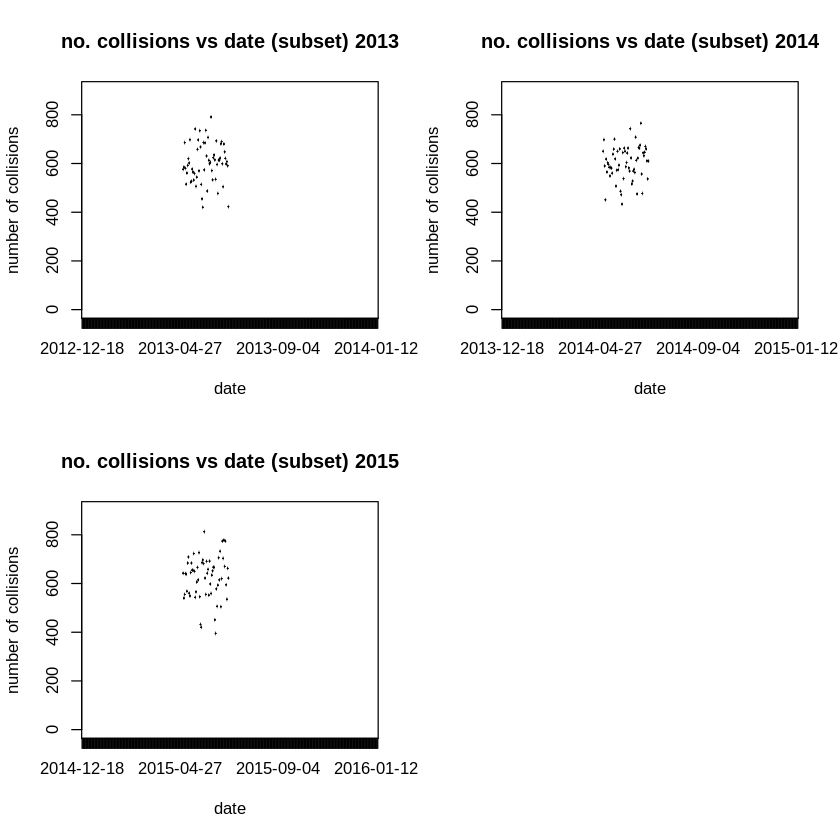

In [190]:
# looking at a different subset of dates in a year (1st May to 30th June), across 4 years
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2013",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(185,549),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2014",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(550,914),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2015",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(915,1279),
   ylim=c(0,900)
   )

Above are the plots for the 2-month May/June subset only, for 2013-2015, with similarities apparent.

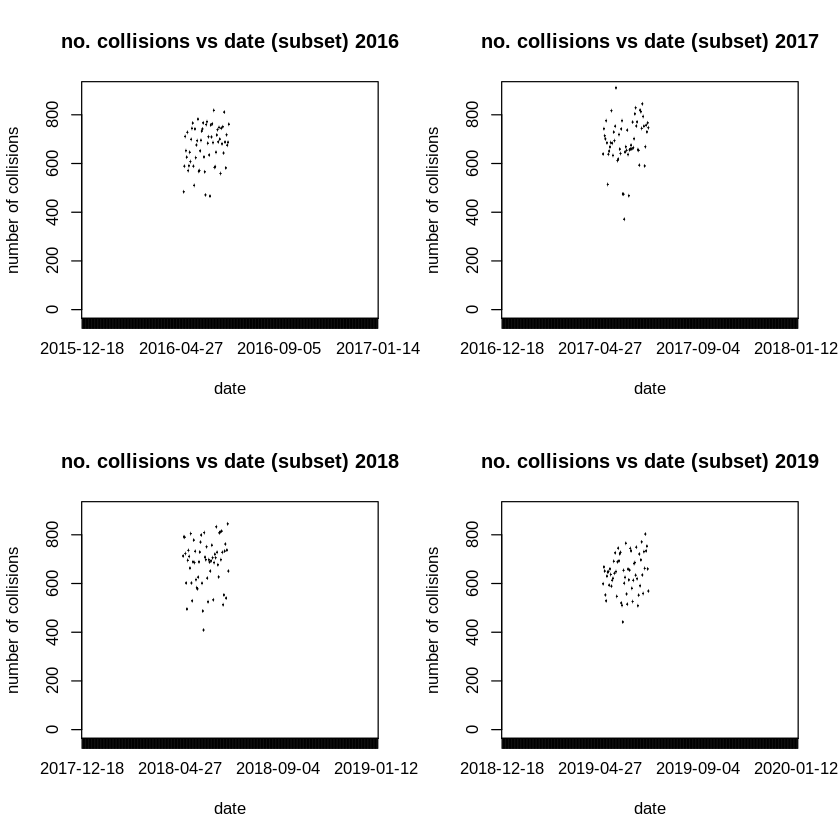

In [191]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2016",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(1280,1645),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2017",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(1646,2010),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2018",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(2011,2375),
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$collision_date,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs date (subset) 2019",
   xlab = "date",
   ylab = "number of collisions",
   xlim=c(2376,2740),
   ylim=c(0,900)
   )

Above are the plots for the 2-month May/June subset only, for 2016-2019. They are largely similar, with a greater variation apparent in 2017.

### 3.4.4 Day of the week

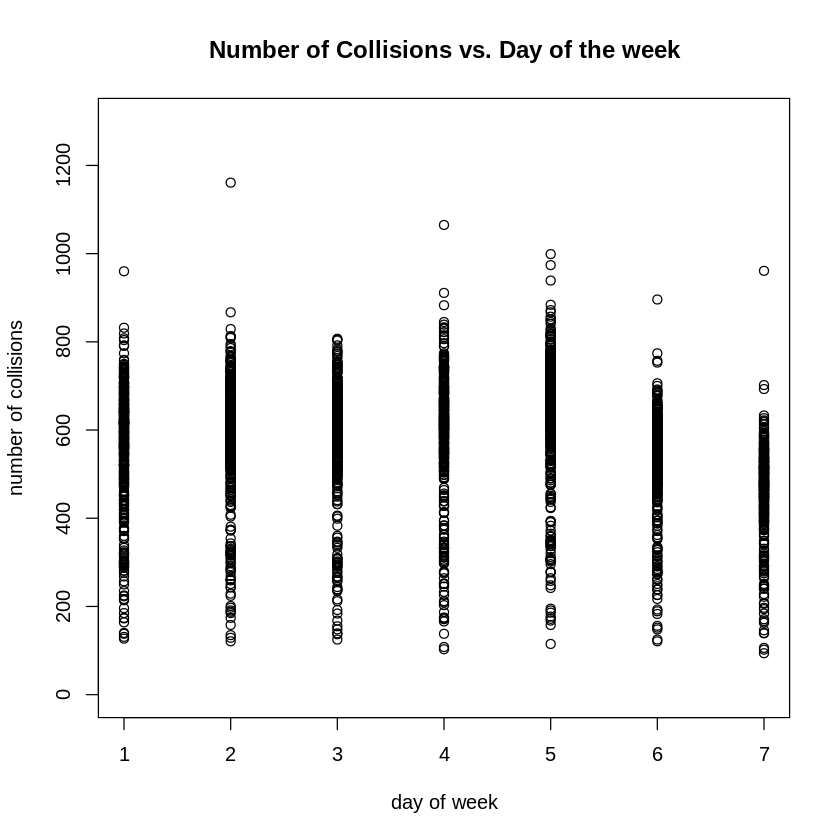

In [192]:
# fewer collisions at the weekend (day 6 = Saturday, day 7 = Sunday)
plot(
  collis$day,
  collis$NUM_COLLISIONS,
  main="Number of Collisions vs. Day of the week",
  xlab = "day of week",
  ylab = "number of collisions",
  ylim=c(0,1300))

Above is a plot of the number of collisions which were recorded against each day of the week, where 1 is Monday, through to 7 being Sunday. There appears to be a general rise through the weekdays, before falling on Saturday to below weekday levels, and lower again on Sunday.

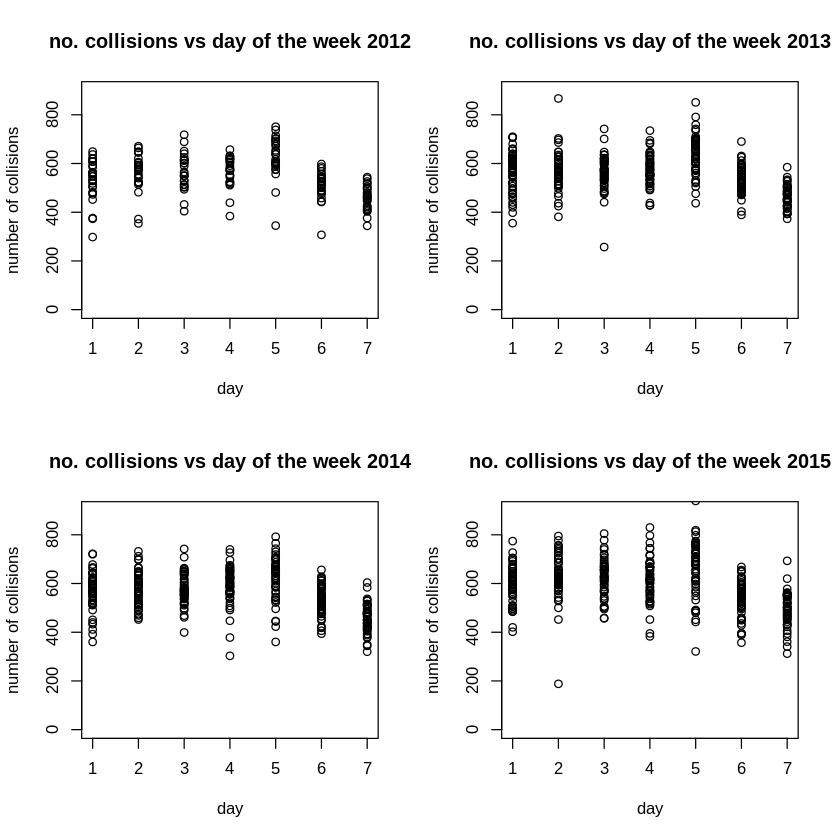

In [193]:
# Plotting collisions against day of the week for the whole year, across 4 years (2012-2015)

par(mfrow = c(2, 2))

plot (
  (subset(collis, collis$year==2012))$day,
  (subset(collis, collis$year==2012))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2012",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2013))$day,
  (subset(collis, collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2013",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2014))$day,
  (subset(collis, collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2014",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2015))$day,
  (subset(collis, collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2015",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

Above are the plots for each year in 2012-2015 showing collisions against day. The pattern described above is evident in these plots.

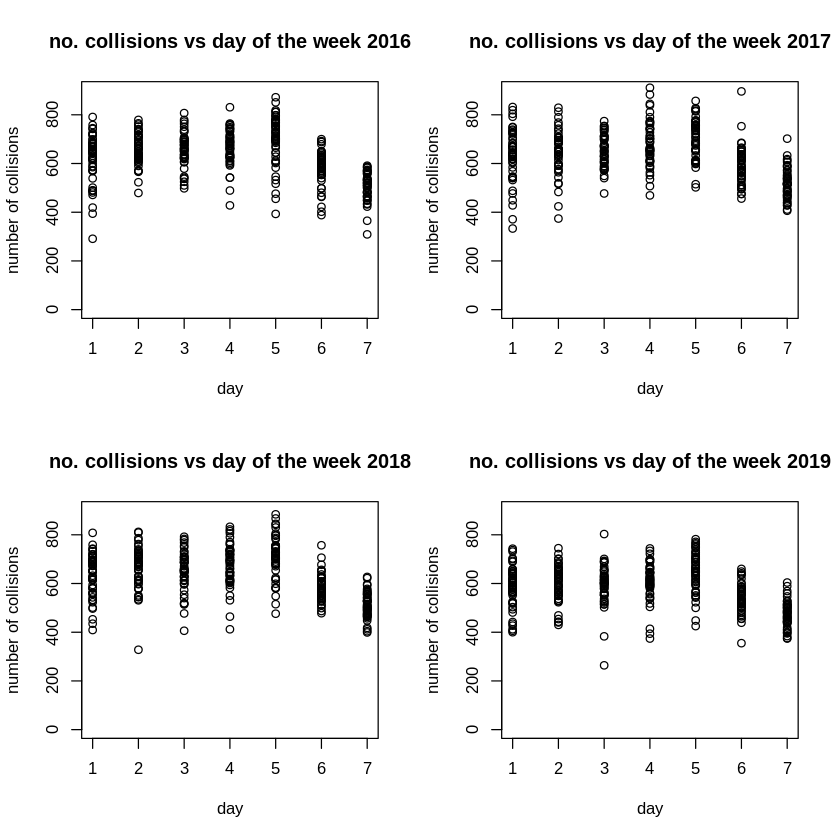

In [194]:
# Plotting collisions against day of the week for the whole year, across 4 years (2016-2019)

par(mfrow = c(2, 2))

plot (
  (subset(collis, collis$year==2016))$day,
  (subset(collis, collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2016",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2017))$day,
  (subset(collis, collis$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2017",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2018))$day,
  (subset(collis, collis$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2018",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, collis$year==2019))$day,
  (subset(collis, collis$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2019",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

Above are the same plots, this time for 2015-2019. The general pattern can again be observed, with some outliers apparent.

### 3.4.5 Day of week: May/June subset

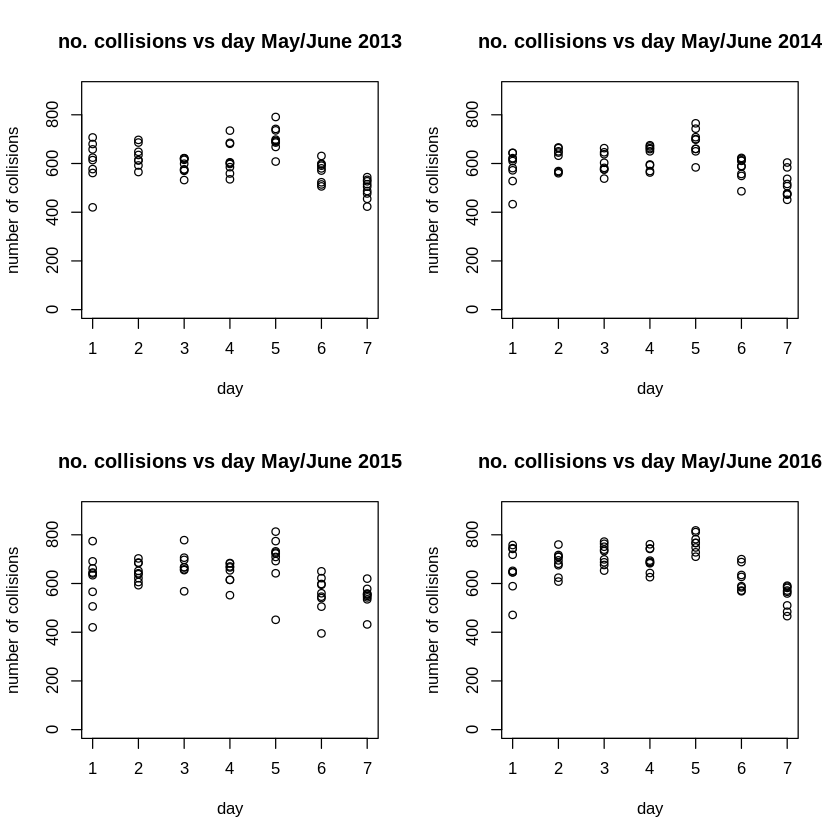

In [195]:
# Plotting collisions against day of the week for a May/June subset of 4 years (2013-2016)

par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$day,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs day May/June 2013",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$day,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs day May/June 2014",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$day,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs day May/June 2015",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$day,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs day May/June 2016",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

In the above plots, now solely considering the collisions by day in May and June alone, for 2013-2016, the pattern is observable, but outliers are apparent in 2015.

### 3.4.6 Day of week: October/November subset

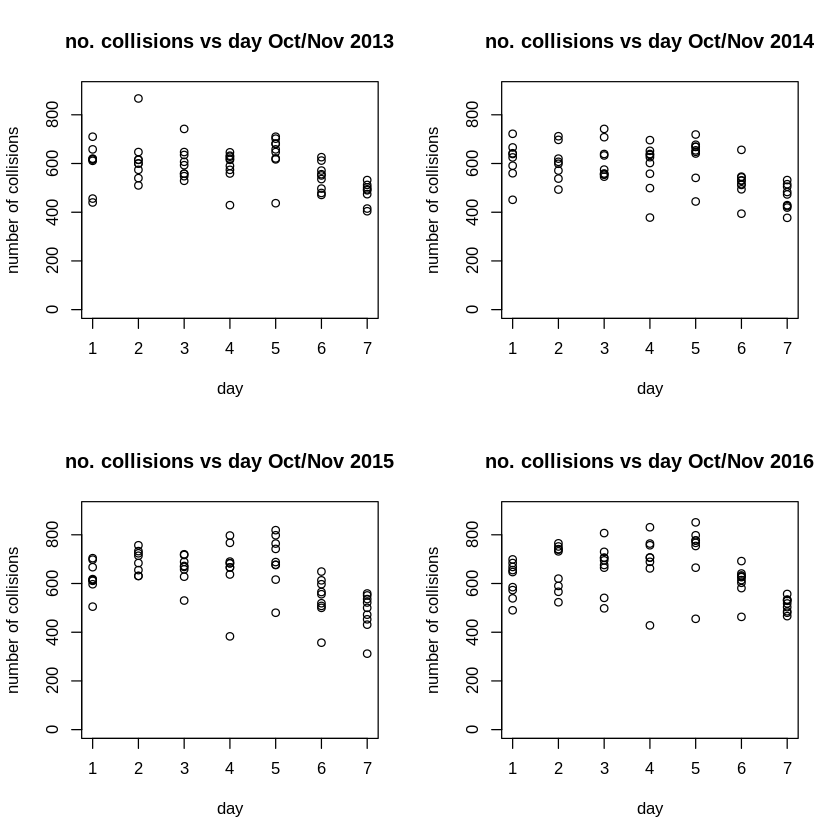

In [196]:
# Plotting collisions against day of the week for an Oct/Nov subset of 4 years (2013-2016)

par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$day,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs day Oct/Nov 2013",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$day,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs day Oct/Nov 2014",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$day,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs day Oct/Nov 2015",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$day,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs day Oct/Nov 2016",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )


The above plots are for the same years 2013-2016 as above, but now solely for October/November subsets. The general pattern observed before does not appear to hold as reliably with these subsets, as there is greater variation between the plots as well as more outliers.

## 3.5 Analysis of date subsets vs weather

It would now be useful to look at these date subsets in relation to some weather factors.

### 3.5.1 Temperature: October/November subsets

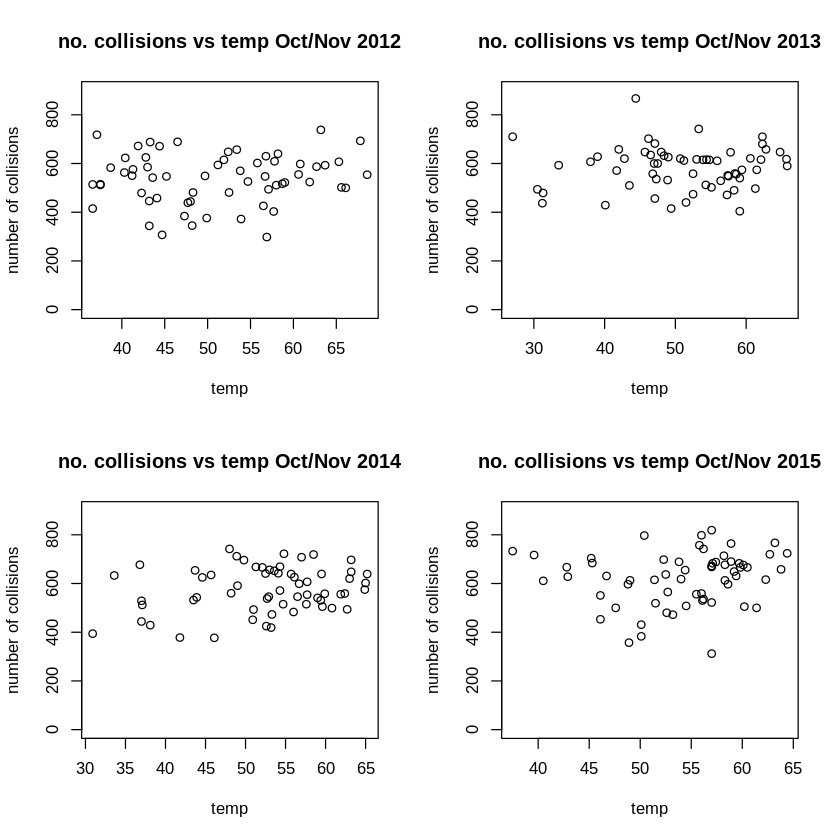

In [197]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2012",
   xlab = "temp",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2013",
   xlab = "temp",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2014",
   xlab = "temp",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2015",
   xlab = "temp",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

Above are the plots of collision numbers against Oct/Nov temperatures in 2012-2015. It appears quite variable rather than consistent.

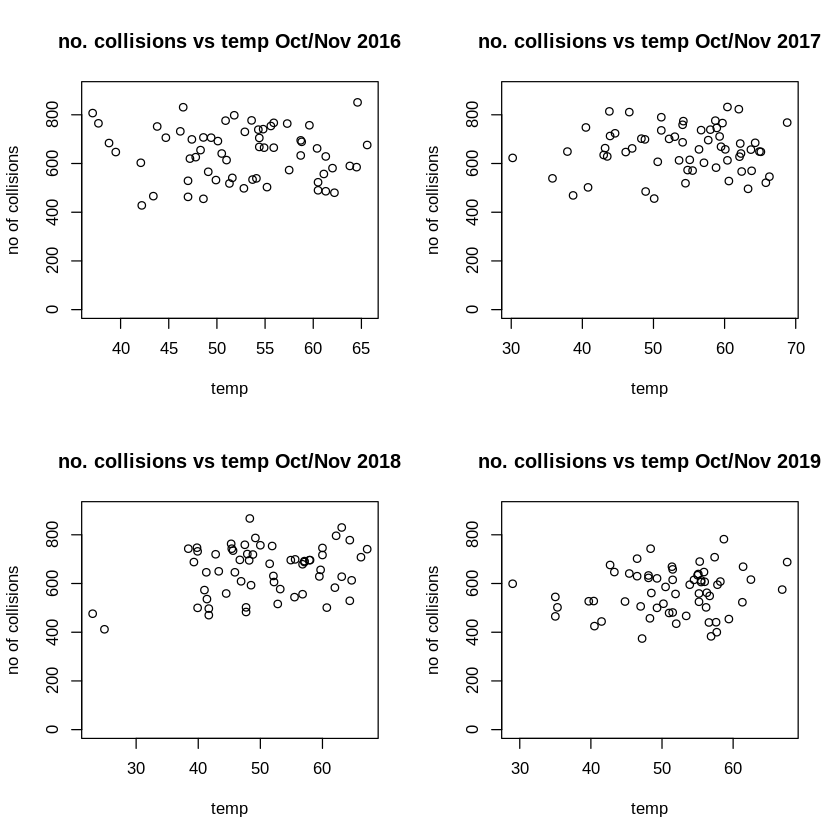

In [198]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2016",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2017",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2018",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs temp Oct/Nov 2019",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )


Above are the plots of collision numbers against temperature for October/November in 2016-2019. No year-on-year consistency is apparent.

In [199]:
# correlation between collisions and temperature in Oct-Nov 2012
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2012))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2013
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2013))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2014
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2014))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2015
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2015))$NUM_COLLISIONS
)

[1] 0.09467163

[1] 0.04228203

[1] 0.2375493

[1] 0.1426495

The above are the correlations between temperature and collision numbers in October/November in 2012-2015. All are positive, but they're highly variable, strongest in 2014, and weakest in 2013.

In [200]:
# correlation between collisions and temperature in Oct-Nov 2016
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2016))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2017
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2017))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2018
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2018))$NUM_COLLISIONS
)
# correlation between collisions and temperature in Oct-Nov 2019
cor (
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$temp,
  (subset(collis, (collis$mo==10 | collis$mo==11) & collis$year==2019))$NUM_COLLISIONS
)

[1] -0.08566123

[1] 0.05445141

[1] 0.1532647

[1] 0.157194

Above are the correlations between the number of collisions and the temperature, for the October/November subsets in 2016-2019. One is negative, the others are positive, and again there is variability.

### 3.5.2 Temperature: May/June subsets

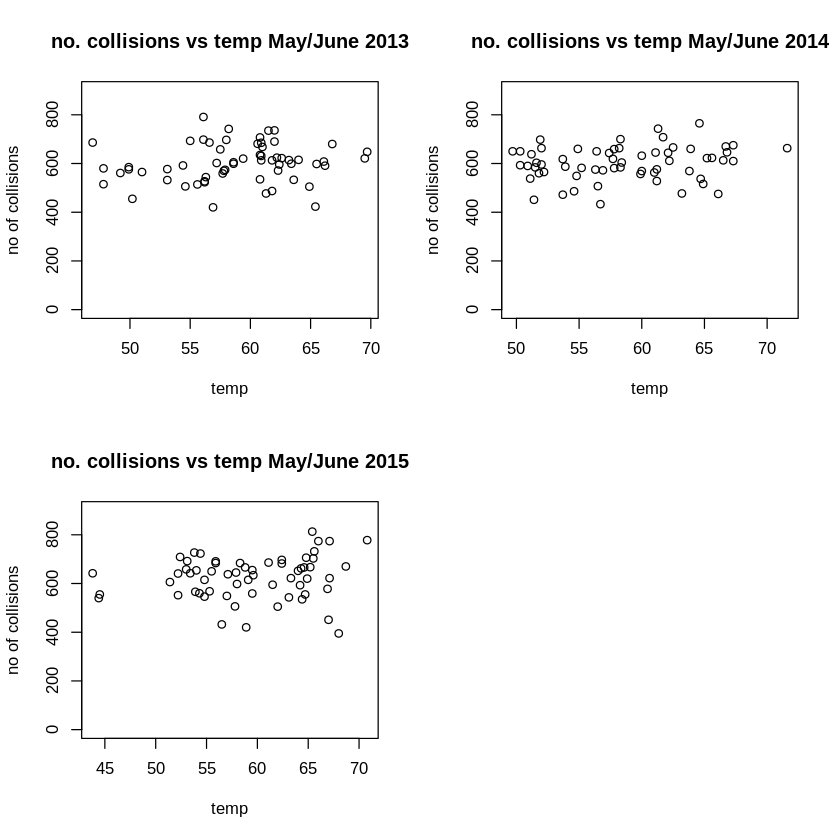

In [201]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2013",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2014",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2015",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

In [202]:
# correlation of temperature against collisions, May-June 2013
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS
)
# correlation of temperature against collisions, May-June 2014
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS
)
# correlation of temperature against collisions, May-June 2015
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS
)

[1] 0.1465895

[1] 0.1755831

[1] 0.1439959

From the correlations above, the correlation between temperature and collisions holds better across different years when looking at May/June than it does when looking at Oct/Nov.

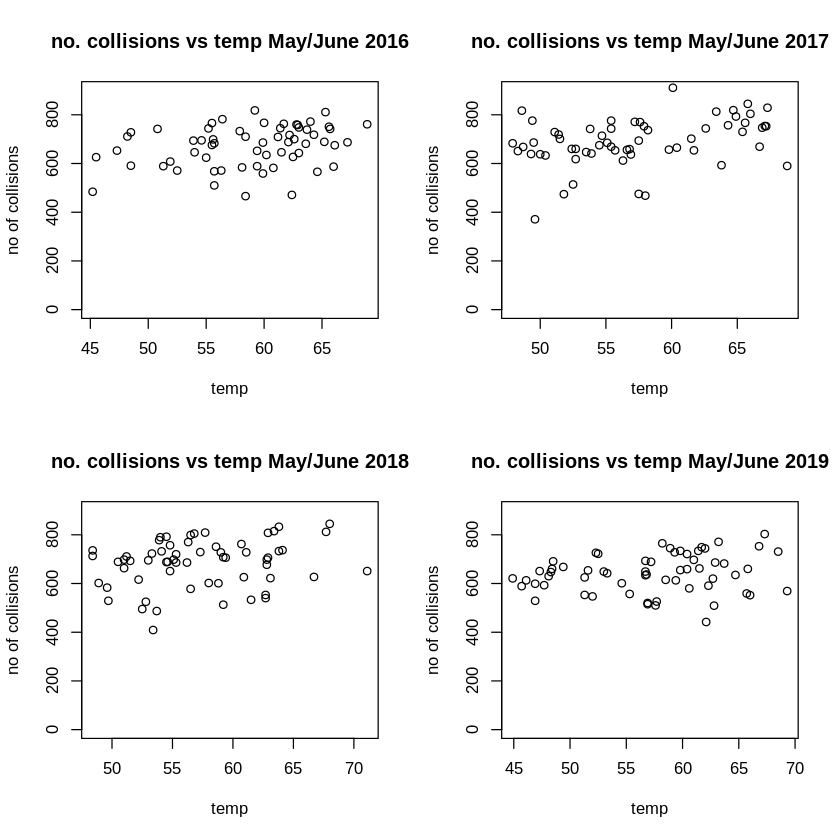

In [203]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2016",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2017",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2018",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs temp May/June 2019",
   xlab = "temp",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

In [204]:
# correlation of temperature against collisions, May-June 2016
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS
)
# correlation of temperature against collisions, May-June 2017
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$NUM_COLLISIONS
)
# correlation of temperature against collisions, May-June 2018
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$NUM_COLLISIONS
)
# correlation of temperature against collisions, May-June 2019
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$temp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$NUM_COLLISIONS
)

[1] 0.2846354

[1] 0.3560452

[1] 0.2131599

[1] 0.193537

The correlations for temperature against collisions in May/June in 2016-2019 are higher than above, supporting the usefulness of this subset compared with October/November.

### 3.5.3 Dewpoint: May/June subsets

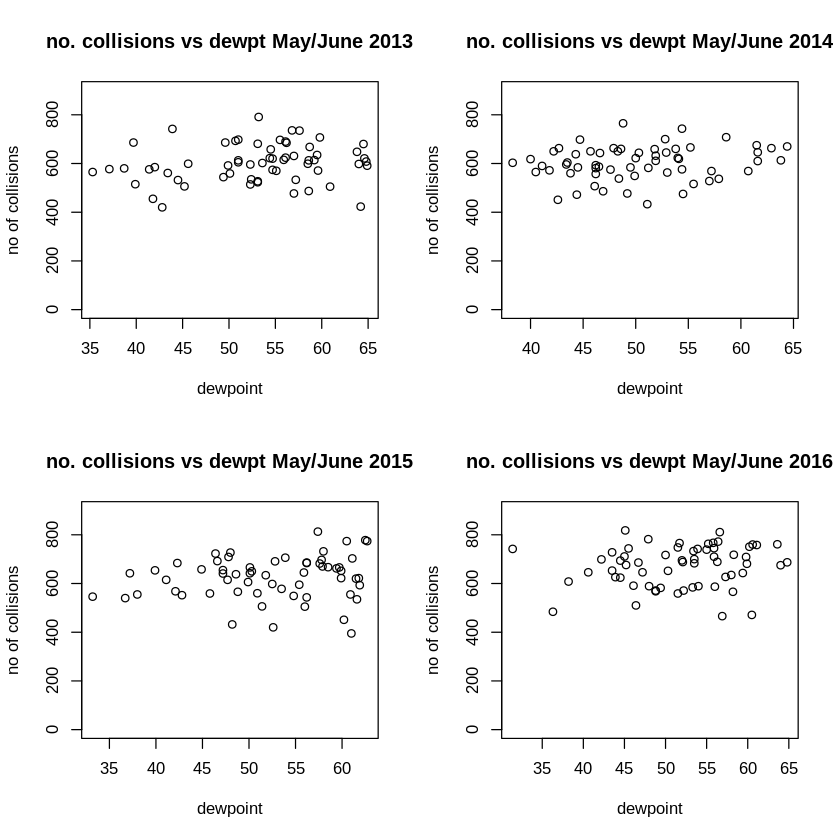

In [205]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs dewpt May/June 2013",
   xlab = "dewpoint",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs dewpt May/June 2014",
   xlab = "dewpoint",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs dewpt May/June 2015",
   xlab = "dewpoint",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs dewpt May/June 2016",
   xlab = "dewpoint",
   ylab = "no of collisions",
   ylim=c(0,900)
   )


Above are plots of dewpoint against collision numbers for the May/June subsets in 2013-2016. There's possibly a small positive relationship between them, but it's not strongly apparent from the plots.

In [206]:
# correlation of dewpoint against collisions, May-June 2013
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2014
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2015
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2016
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2017
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2018
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$NUM_COLLISIONS
)
# correlation of dewpoint against collisions, May-June 2019
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$dewp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$NUM_COLLISIONS
)

[1] 0.1766468

[1] 0.1786309

[1] 0.1559653

[1] 0.1436078

[1] 0.3213277

[1] 0.1829252

[1] 0.2302191

The correlations of dew point against the May/June subsets for 2013-2019 are all positive and most are similar.

### 3.5.4 Precipitation: May/June subsets

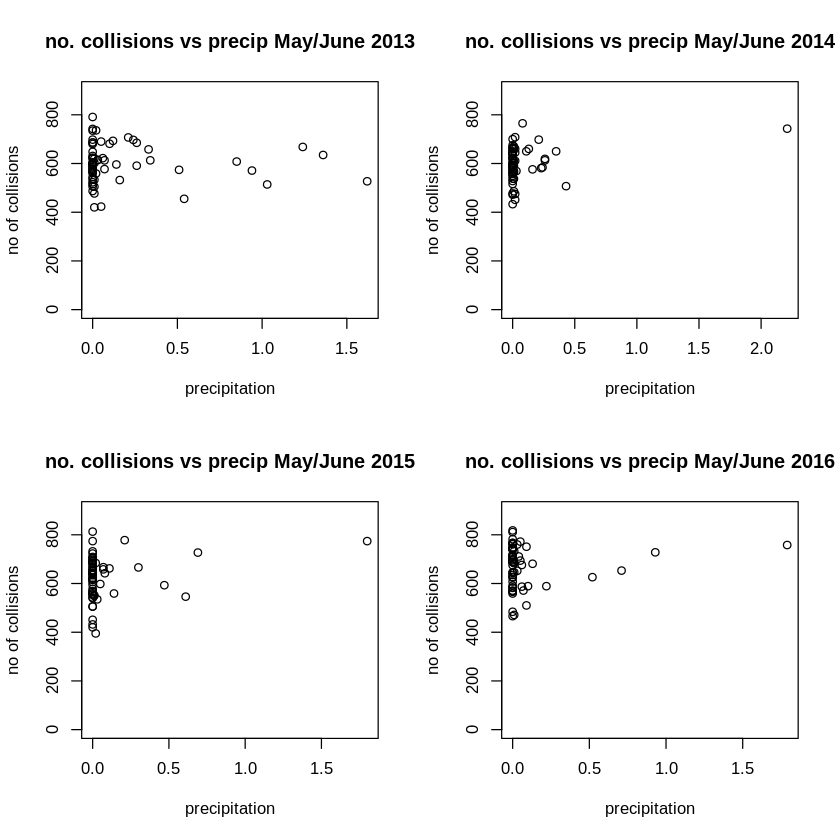

In [207]:
par(mfrow = c(2, 2))

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs precip May/June 2013",
   xlab = "precipitation",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs precip May/June 2014",
   xlab = "precipitation",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs precip May/June 2015",
   xlab = "precipitation",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs precip May/June 2016",
   xlab = "precipitation",
   ylab = "no of collisions",
   ylim=c(0,900)
   )

Above shows the plots of precipitation against collision numbers in May/June 2013-2016. A relationship isn't evident but wasn't expected (given the full-year correlations in 3.3.10). It's nevertheless useful to look.

### 3.5.5 Windspeed: May/June subsets

In [208]:
# correlation of windspeed against collisions, May-June 2013
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2013))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2014
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2014))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2015
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2015))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2016
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2016))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2017
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2017))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2018
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2018))$NUM_COLLISIONS
)
# correlation of windspeed against collisions, May-June 2019
cor (
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$prcp,
  (subset(collis, (collis$mo==5 | collis$mo==6) & collis$year==2019))$NUM_COLLISIONS
)

[1] -0.06516561

[1] 0.2683277

[1] 0.2285584

[1] 0.1006942

[1] 0.09336425

[1] 0.0445645

[1] 0.2240768

The correlations above for precipitation against collisions in May/June show a mixed picture across the years. There are good positive correlations in 2014, 2015 and 2019, but they're smaller in other years and negative in 2013.

## 3.6 Linear relationships

### 3.6.1 Reorganising the numbering of days

The next step is to use the observed pattern of collisions against the day of the week to reorder the days and create a more linear relationship.

In [209]:
collorg <- collis

In [210]:
head(collorg)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 7   2012 7  1  2012-07-01     83.6 63.0 1008.9  9.7  4.1   9.9   18.1 93.0
2 1   2012 7  2  2012-07-02     80.3 54.1 1011.6 10.0  3.8  15.0  999.9 88.0
3 2   2012 7  3  2012-07-03     79.8 56.7 1012.8 10.0  2.9  12.0  999.9 88.0
4 3   2012 7  4  2012-07-04     81.8 65.6 1009.1  9.2  3.6  11.1  999.9 91.0
5 4   2012 7  5  2012-07-05     86.7 64.3 1007.4  9.4  3.8  15.0  999.9 93.9
6 5   2012 7  6  2012-07-06     81.9 62.3 1011.7 10.0  3.1   9.9  999.9 91.0
  min  prcp  sndp  fog NUM_COLLISIONS
1 66.0  0.00 999.9 0   538           
2 66.9  0.00 999.9 0   564           
3 63.0  0.00 999.9 0   664           
4 68.0  0.06 999.9 0   432           
5 70.0 99.99 999.9 0   591           
6 66.9  0.00 999.9 0   638

As noted before, day 1 is Monday (e.g. Monday 2/7/12), day 2 is Tuesday (e.g. Tuesday 3/7/12) etc.

As discussed above, it appears that collisions largely increase through the weekdays from Monday to Friday, before dropping on Saturday to a lower level than Monday, then dropping again on Sunday. It would be preferable to order the days as Sun, Sat, Mon, Tue, Wed, Thu, Fri.

The first step is to add 2 to every day (1-7 becomes 3-9). Then change Saturday from day 8 to day 2, and change Sunday from day 9 to day 1. Accordingly, days 1-7 will be Sun, Sat, Mon-Fri as required.

In [211]:
collorg$day <- collorg$day+2

In [212]:
collorg$day[collorg$day ==8] <- 2

In [213]:
collorg$day[collorg$day ==9] <- 1

In [214]:
tail(collorg)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
3101 2   2020 12 26 2020-12-26     40.1 29.4 1008.2  8.8  19.7 27.0   35.9 59.0
3102 1   2020 12 27 2020-12-27     34.2 21.2 1021.2 10.0   7.7 15.0   22.0 44.1
3103 3   2020 12 28 2020-12-28     43.0 36.2 1024.8 10.0   9.5 14.0  999.9 52.0
3104 4   2020 12 29 2020-12-29     41.3 26.2 1022.0  9.7  13.0 19.0   28.0 52.0
3105 5   2020 12 30 2020-12-30     34.1 17.0 1029.9 10.0  11.0 19.0   24.1 48.0
3106 6   2020 12 31 2020-12-31     48.8 43.9 1018.7  8.4  14.6 24.1   29.9 53.6
     min  prcp sndp  fog NUM_COLLISIONS
3101 34.0 1.18 999.9 0   226           
3102 28.9 0.00 999.9 0   184           
3103 26.1 0.00 999.9 0   217           
3104 32.0 0.00 999.9 0   244           
3105 25.0 0.00 999.9 0   238           
3106 43.0 0.03 999.9 0   278

26/12/20 is a Saturday and is day 2, 27/12/20 is a Sunday and is day 1, then 28/12/20 is a Monday and is day 3 etc.

### 3.6.2 Analysis of the reordered day information

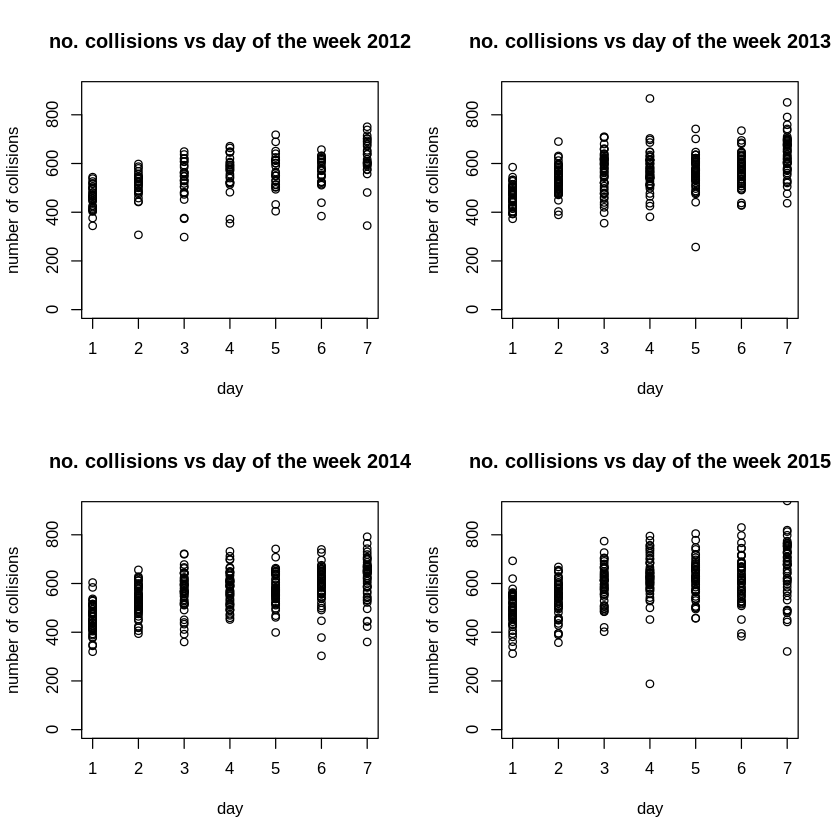

In [215]:
# Plotting collisions against (reordered) day of the week for the whole year, across 4 years (2012-2015)

par(mfrow = c(2, 2))

plot (
  (subset(collorg, collorg$year==2012))$day,
  (subset(collorg, collorg$year==2012))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2012",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2013))$day,
  (subset(collorg, collorg$year==2013))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2013",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2014))$day,
  (subset(collorg, collorg$year==2014))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2014",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2015))$day,
  (subset(collorg, collorg$year==2015))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2015",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

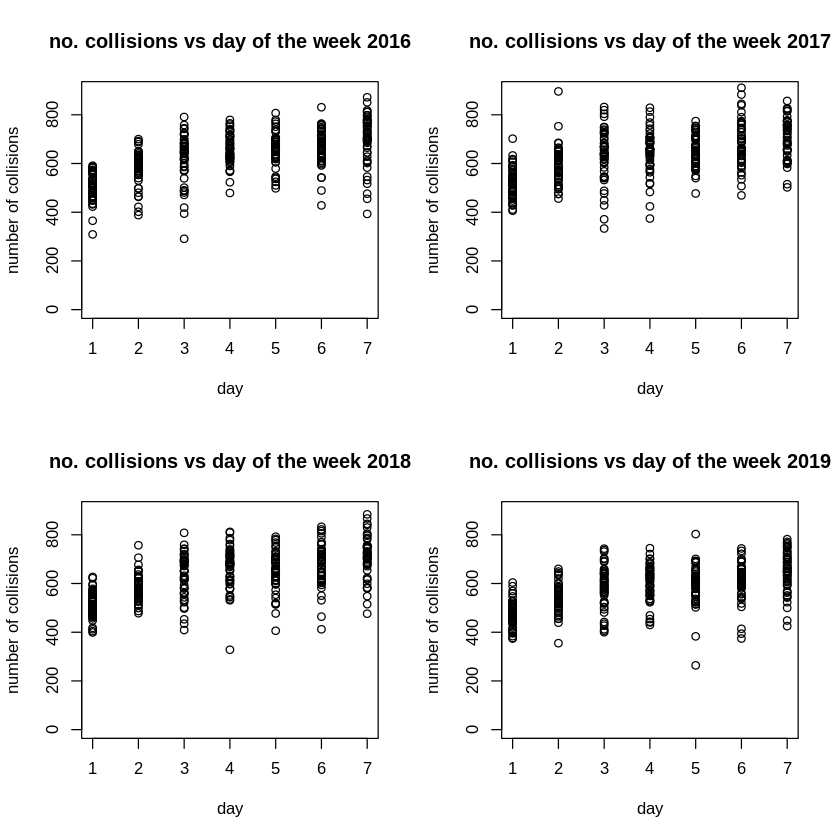

In [216]:
# Plotting collisions against (reordered) day of the week for the whole year, across 4 years (2016-2019)

par(mfrow = c(2, 2))

plot (
  (subset(collorg, collorg$year==2016))$day,
  (subset(collorg, collorg$year==2016))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2016",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2017))$day,
  (subset(collorg, collorg$year==2017))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2017",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2018))$day,
  (subset(collorg, collorg$year==2018))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2018",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

plot (
  (subset(collorg, collorg$year==2019))$day,
  (subset(collorg, collorg$year==2019))$NUM_COLLISIONS,
   main="no. collisions vs day of the week 2019",
   xlab = "day",
   ylab = "number of collisions",
   ylim=c(0,900)
   )

Above are the plots of collisions against reordered day of the week, for 2012-2019. A reasonable linear relationship is apparent in each of these years. 2020 was ignored because the data was so distortingly impacted by Covid, but the decision to exclude 2020 will be checked in the correlations below.

In [217]:
# Comparing the above with correlation where the days have not been reordered
cor (coll$day, coll$NUM_COLLISIONS)

[1] -0.1891

The correlation above is for collisions against the original days of the week, to allow a comparison. It is negative and as was noted from the plots, there wasn't a useful linear relationship.

In [218]:
# correlation of day against collisions, all years
cor (collorg$day, collorg$NUM_COLLISIONS)

[1] 0.3358841

Above is the correlation of collisions against the reordered days, for all years. This is a strong positive correlation. However, it includes 2020, so it would be useful to look at the correlation when 2020 is excluded.

In [219]:
# correlation of day against collisions, each year 2012-2020
cor (
  (subset(collorg, (collorg$year==2012)))$day,
  (subset(collorg, (collorg$year==2012)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2013)))$day,
  (subset(collorg, (collorg$year==2013)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2014)))$day,
  (subset(collorg, (collorg$year==2014)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2015)))$day,
  (subset(collorg, (collorg$year==2015)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2016)))$day,
  (subset(collorg, (collorg$year==2016)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2017)))$day,
  (subset(collorg, (collorg$year==2017)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2018)))$day,
  (subset(collorg, (collorg$year==2018)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2019)))$day,
  (subset(collorg, (collorg$year==2019)))$NUM_COLLISIONS
)
cor (
  (subset(collorg, (collorg$year==2020)))$day,
  (subset(collorg, (collorg$year==2020)))$NUM_COLLISIONS
)

[1] 0.5409252

[1] 0.5099835

[1] 0.4721393

[1] 0.4597042

[1] 0.5806811

[1] 0.5420509

[1] 0.5798778

[1] 0.5352299

[1] 0.1762216

Above are the correlations between reordered day and collision numbers in each year 2012-2020. All are good positive correlations. However, the correlation in 2020 is markedly different to the other years, caused by a disruption in normal collision patterns in that year, which is impacting  is on the correlation across all years. It is reasonable therefore to exclude 2020.

In [220]:
cor (
  (subset(collorg, collorg$year != 2020))$day,
  (subset(collorg, collorg$year != 2020))$NUM_COLLISIONS
)

[1] 0.4976306

In the above correlation, 2020 is excluded, and the overall correlation between reordered day and collisions has increased from 0.336 to 0.498.

### 3.6.3 Assigning dayofyear and dayindex

The next step is to assign the day of year (as in, from 1-365 for that year) for every record, and also to assign the day index (as in, a unique number from 1 through to >3000 from the earliest to latest dates) for every record. The former allows for the yearly plots to be overlaid, and the latter allows the yearly data to be plotted side by side.

In [221]:
collorgsplitcheck <- collorg

In [222]:
cosc12 <- collorgsplitcheck[which(collorgsplitcheck$year == 2012), ]

In [223]:
dayofyear <- 1*seq_len(nrow(cosc12))
dayindex <- 1*seq_len(nrow(cosc12))
cosc12a <- cbind(dayindex, dayofyear, cosc12)

In [224]:
cosc13 <- collorgsplitcheck[which(collorgsplitcheck$year == 2013), ]

In [225]:
dayofyear <- 1*seq_len(nrow(cosc13))
dayindex <- 1*seq_len(nrow(cosc13)) + 184
cosc13a <- cbind(dayindex, dayofyear, cosc13)

In [226]:
cosc14 <- collorgsplitcheck[which(collorgsplitcheck$year == 2014), ]

In [227]:
dayofyear <- 1*seq_len(nrow(cosc14))
dayindex <- 1*seq_len(nrow(cosc14)) + 549
cosc14a <- cbind(dayindex, dayofyear, cosc14)

In [228]:
cosc15 <- collorgsplitcheck[which(collorgsplitcheck$year == 2015), ]

In [229]:
dayofyear <- 1*seq_len(nrow(cosc15))
dayindex <- 1*seq_len(nrow(cosc15)) + 914
cosc15a <- cbind(dayindex, dayofyear, cosc15)

In [230]:
cosc16 <- collorgsplitcheck[which(collorgsplitcheck$year == 2016), ]

In [231]:
dayofyear <- 1*seq_len(nrow(cosc16))
dayindex <- 1*seq_len(nrow(cosc16)) + 1279
cosc16a <- cbind(dayindex, dayofyear, cosc16)

In [232]:
cosc17 <- collorgsplitcheck[which(collorgsplitcheck$year == 2017), ]

In [233]:
dayofyear <- 1*seq_len(nrow(cosc17))
dayindex <- 1*seq_len(nrow(cosc17)) + 1645
cosc17a <- cbind(dayindex, dayofyear, cosc17)

In [234]:
cosc18 <- collorgsplitcheck[which(collorgsplitcheck$year == 2018), ]

In [235]:
dayofyear <- 1*seq_len(nrow(cosc18))
dayindex <- 1*seq_len(nrow(cosc18)) + 2010
cosc18a <- cbind(dayindex, dayofyear, cosc18)

In [236]:
cosc19 <- collorgsplitcheck[which(collorgsplitcheck$year == 2019), ]

In [237]:
dayofyear <- 1*seq_len(nrow(cosc19))
dayindex <- 1*seq_len(nrow(cosc19)) + 2375
cosc19a <- cbind(dayindex, dayofyear, cosc19)

In [238]:
cosc20 <- collorgsplitcheck[which(collorgsplitcheck$year == 2020), ]

In [239]:
dayofyear <- 1*seq_len(nrow(cosc20))
dayindex <- 1*seq_len(nrow(cosc20)) + 2740
cosc20a <- cbind(dayindex, dayofyear, cosc20)

In [240]:
tail(cosc20a)

dayindex dayofyear day year mo da collision_date temp dewp slp    visib
3101 3101     361       2   2020 12 26 2020-12-26     40.1 29.4 1008.2  8.8 
3102 3102     362       1   2020 12 27 2020-12-27     34.2 21.2 1021.2 10.0 
3103 3103     363       3   2020 12 28 2020-12-28     43.0 36.2 1024.8 10.0 
3104 3104     364       4   2020 12 29 2020-12-29     41.3 26.2 1022.0  9.7 
3105 3105     365       5   2020 12 30 2020-12-30     34.1 17.0 1029.9 10.0 
3106 3106     366       6   2020 12 31 2020-12-31     48.8 43.9 1018.7  8.4 
     wdsp mxpsd gust  max  min  prcp sndp  fog NUM_COLLISIONS
3101 19.7 27.0   35.9 59.0 34.0 1.18 999.9 0   226           
3102  7.7 15.0   22.0 44.1 28.9 0.00 999.9 0   184           
3103  9.5 14.0  999.9 52.0 26.1 0.00 999.9 0   217           
3104 13.0 19.0   28.0 52.0 32.0 0.00 999.9 0   244           
3105 11.0 19.0   24.1 48.0 25.0 0.00 999.9 0   238           
3106 14.6 24.1   29.9 53.6 43.0 0.03 999.9 0   278

Having completed the dayofyear and dayindex steps above for each year, new plots can be produced.

In [241]:
library(ggplot2)

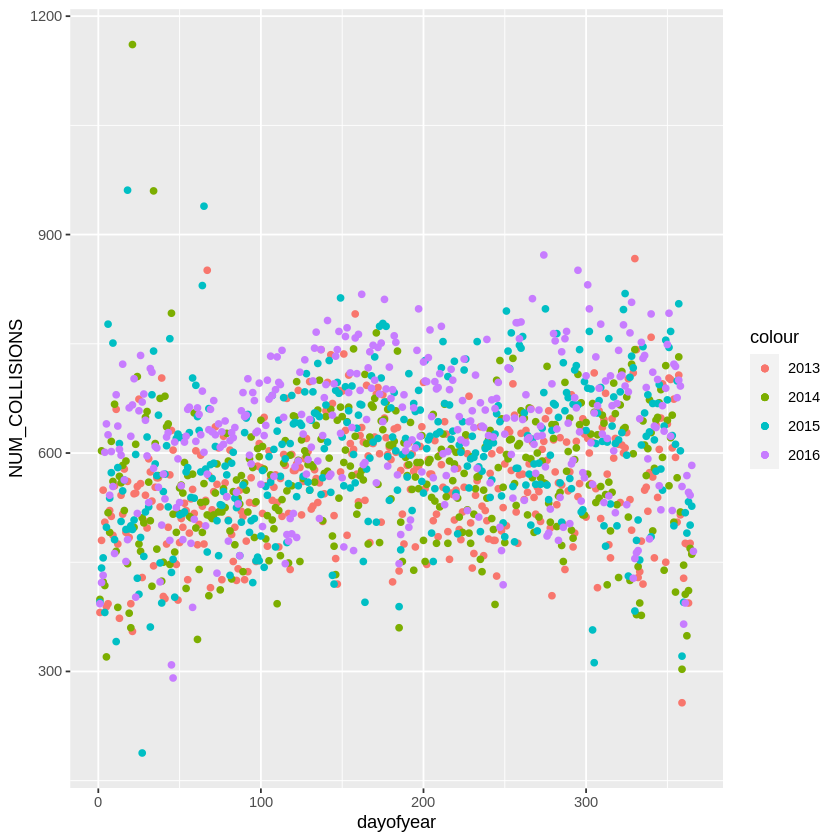

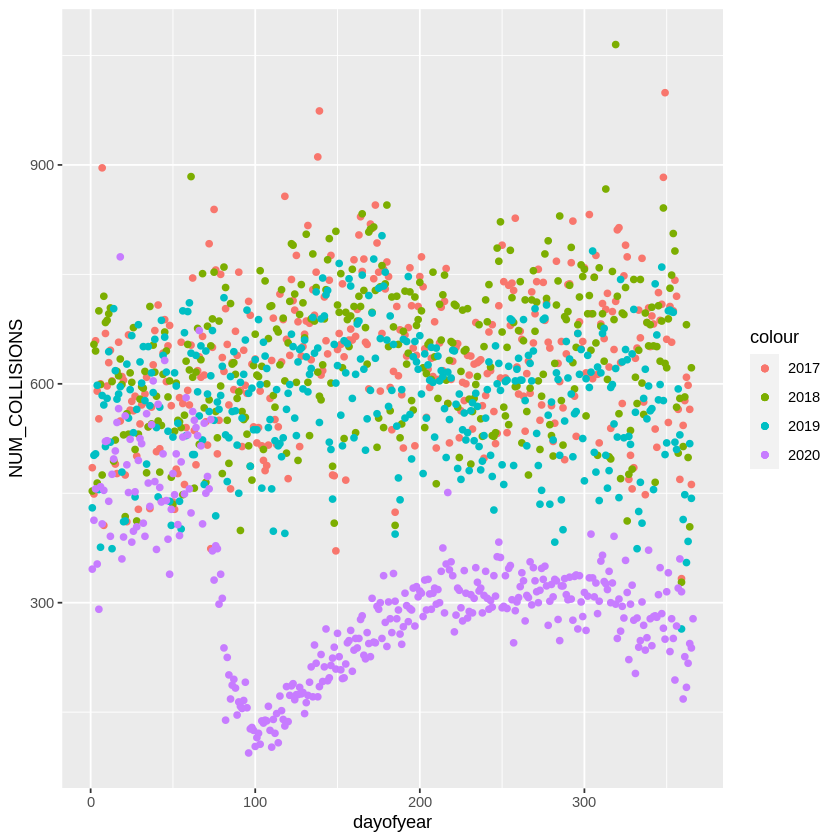

In [242]:
ggplot() +
  geom_point(data=cosc13a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cosc15a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16a, aes(dayofyear, NUM_COLLISIONS, color="2016"))

ggplot() +

  geom_point(data=cosc17a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cosc18a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19a, aes(dayofyear, NUM_COLLISIONS, color="2019")) +
  geom_point(data=cosc20a, aes(dayofyear, NUM_COLLISIONS, color="2020"))

Above are 2 plots, for 2013-2016 and 2017-2020, where dayofyear has been used, the data is overlaid and colour is used to distinguish between the years. This aids with the visualisation of seasonal patterns.

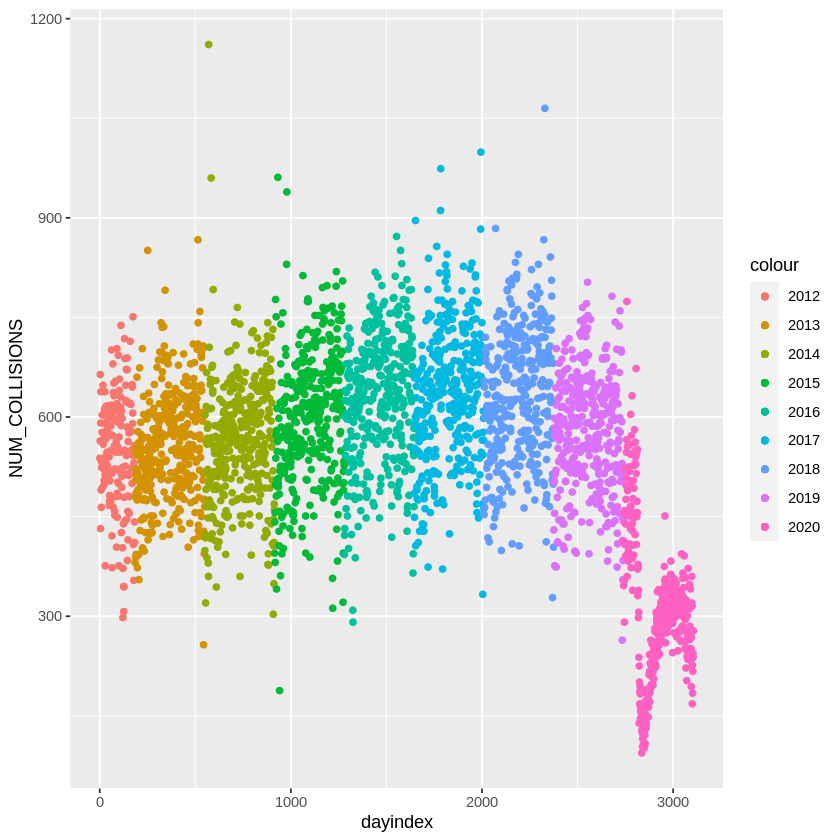

In [243]:
ggplot() +
  geom_point(data=cosc12a, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=cosc13a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cosc15a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cosc17a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cosc18a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19a, aes(dayindex, NUM_COLLISIONS, color="2019")) +
  geom_point(data=cosc20a, aes(dayindex, NUM_COLLISIONS, color="2020"))

Above is a plot, for all of the years, where dayindex has been used, the data the years are side by side and colour is used to distinguish between the years. This plot is particularly useful in visualising that collision numbers are increasing in each year, before falling in 2019, though with the same general pattern, before falling and changing significantly in 2020.

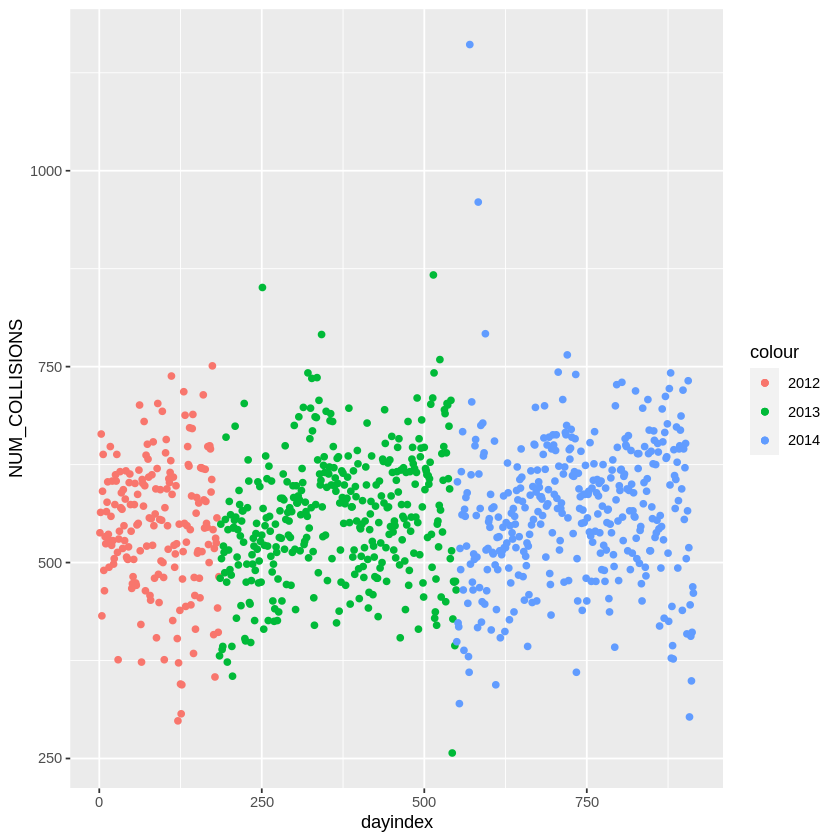

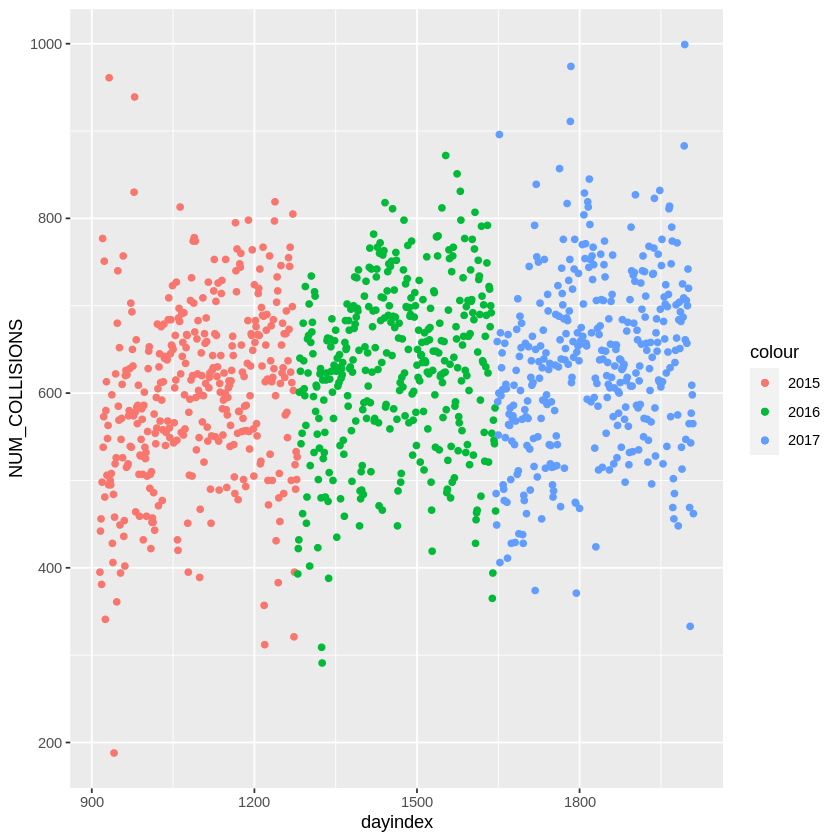

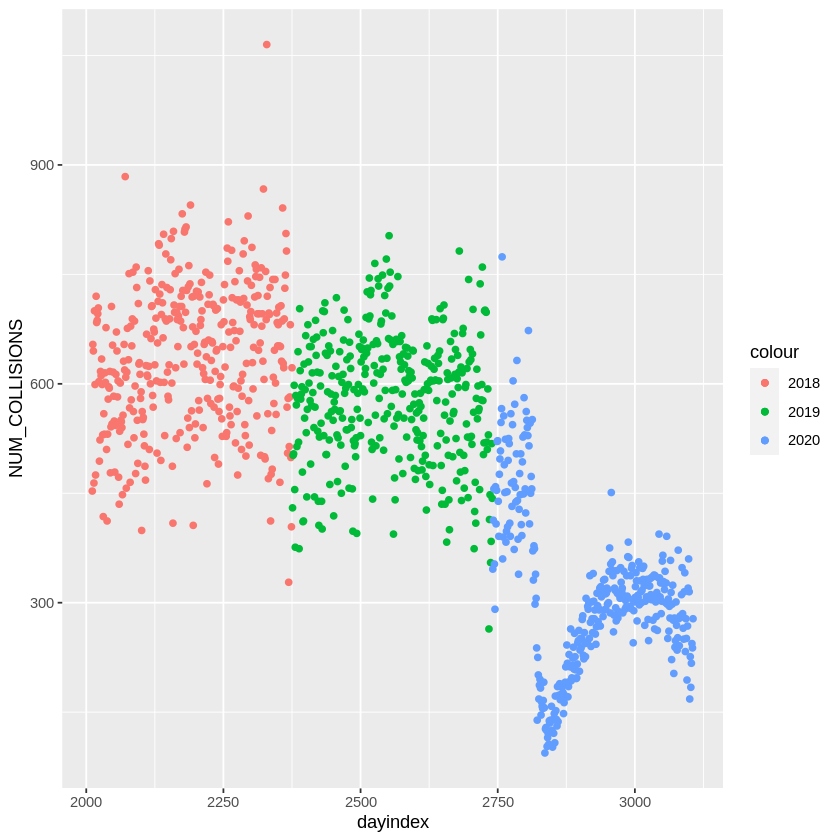

In [244]:
ggplot() +
  geom_point(data=cosc12a, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=cosc13a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14a, aes(dayindex, NUM_COLLISIONS, color="2014"))

ggplot() +
  geom_point(data=cosc15a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cosc17a, aes(dayindex, NUM_COLLISIONS, color="2017"))

ggplot() +
  geom_point(data=cosc18a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19a, aes(dayindex, NUM_COLLISIONS, color="2019")) +
  geom_point(data=cosc20a, aes(dayindex, NUM_COLLISIONS, color="2020"))

Above are three plots, again using collisions against dayindex, but plotting only 3 years at a time, allowing the within-year seasonal patterns to be seen.

In [245]:
summary(cosc12a$NUM_COLLISIONS)
summary(cosc13a$NUM_COLLISIONS)
summary(cosc14a$NUM_COLLISIONS)
summary(cosc15a$NUM_COLLISIONS)
summary(cosc16a$NUM_COLLISIONS)
summary(cosc17a$NUM_COLLISIONS)
summary(cosc18a$NUM_COLLISIONS)
summary(cosc19a$NUM_COLLISIONS)
summary(cosc20a$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.0   500.0   548.5   546.4   604.5   751.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   568.0   564.5   623.0  1161.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   242.2   301.0   308.5   348.0   774.0 

Above are the summaries, which also show the number of collisions increasing year on year from 2012 to 2018, falling in 2019 to below 2015 levels, and falling sharply in 2020.

In [246]:
sd(cosc12a$NUM_COLLISIONS)
sd(cosc13a$NUM_COLLISIONS)
sd(cosc14a$NUM_COLLISIONS)
sd(cosc15a$NUM_COLLISIONS)
sd(cosc16a$NUM_COLLISIONS)
sd(cosc17a$NUM_COLLISIONS)
sd(cosc18a$NUM_COLLISIONS)
sd(cosc19a$NUM_COLLISIONS)
sd(cosc20a$NUM_COLLISIONS)

[1] 84.73712

[1] 83.27946

[1] 93.0723

[1] 102.8016

[1] 97.43396

[1] 102.3393

[1] 99.87653

[1] 88.94708

[1] 110.1876

Above are the standard deviations for collisions in each year, which are relatively consistent if 2020 is disregarded. Ignoring 2020, the standard deviation is lower when the median daily collisions are below 600 (2012, 2013, 2014 and 2019).

### 3.6.4 Removing outliers

The plots in 3.6.3 showed clear outliers in the number of collisions. As a first step, the outliers above 850 and below 375 will be removed from 2012-2019. 2020 will be disregarded.

In [247]:
cosc12b <- cosc12a[which(cosc12a$NUM_COLLISIONS >= 375), ]
cosc13b <- cosc13a[which(cosc13a$NUM_COLLISIONS >= 375), ]
cosc14b <- cosc14a[which(cosc14a$NUM_COLLISIONS >= 375), ]
cosc15b <- cosc15a[which(cosc15a$NUM_COLLISIONS >= 375), ]
cosc16b <- cosc16a[which(cosc16a$NUM_COLLISIONS >= 375), ]
cosc17b <- cosc17a[which(cosc17a$NUM_COLLISIONS >= 375), ]
cosc18b <- cosc18a[which(cosc18a$NUM_COLLISIONS >= 375), ]
cosc19b <- cosc19a[which(cosc19a$NUM_COLLISIONS >= 375), ]
cosc12c <- cosc12b[which(cosc12b$NUM_COLLISIONS <= 850), ]
cosc13c <- cosc13b[which(cosc13b$NUM_COLLISIONS <= 850), ]
cosc14c <- cosc14b[which(cosc14b$NUM_COLLISIONS <= 850), ]
cosc15c <- cosc15b[which(cosc15b$NUM_COLLISIONS <= 850), ]
cosc16c <- cosc16b[which(cosc16b$NUM_COLLISIONS <= 850), ]
cosc17c <- cosc17b[which(cosc17b$NUM_COLLISIONS <= 850), ]
cosc18c <- cosc18b[which(cosc18b$NUM_COLLISIONS <= 850), ]
cosc19c <- cosc19b[which(cosc19b$NUM_COLLISIONS <= 850), ]

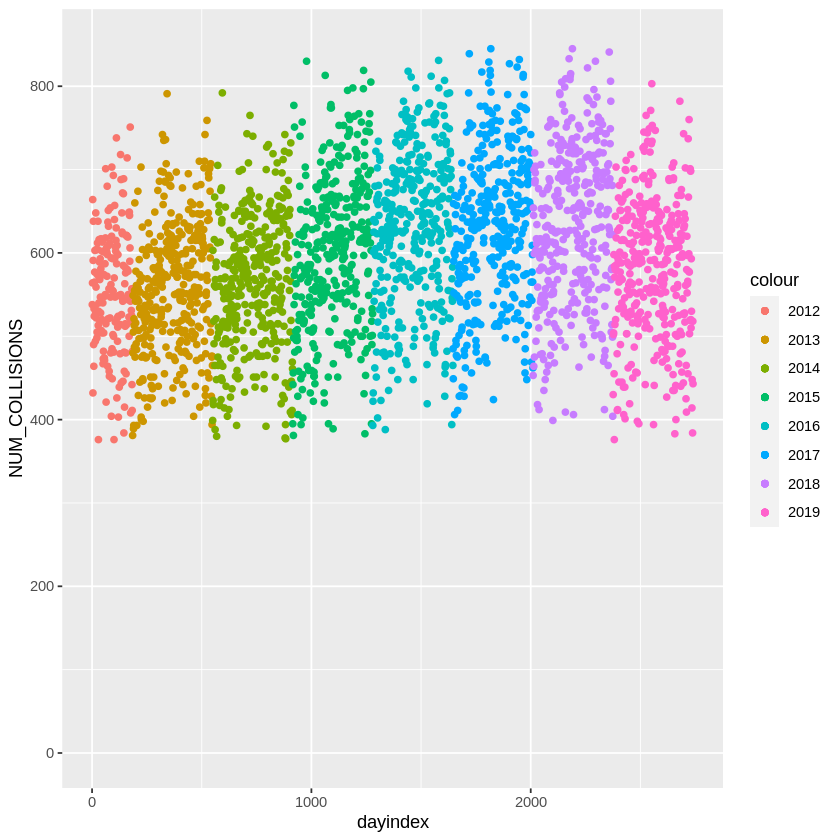

In [248]:
ggplot() +
  geom_point(data=cosc12c, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=cosc13c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cosc15c, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cosc17c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cosc18c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19c, aes(dayindex, NUM_COLLISIONS, color="2019")) + ylim(0, 850)

Above shows a tidier plot for 2012-2019 with the most extreme outliers eliminated.

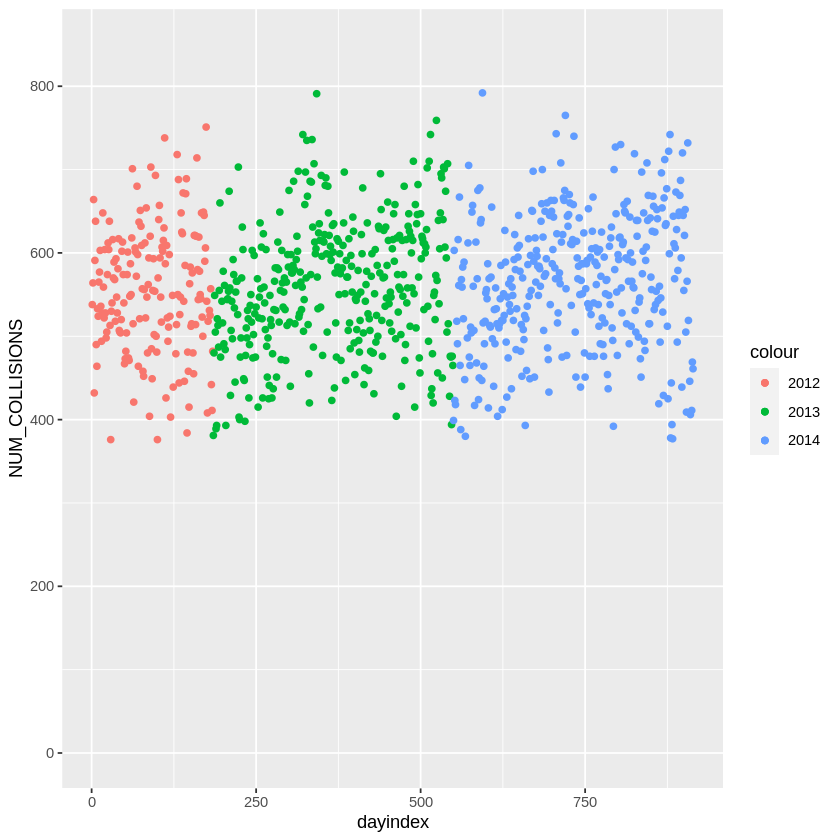

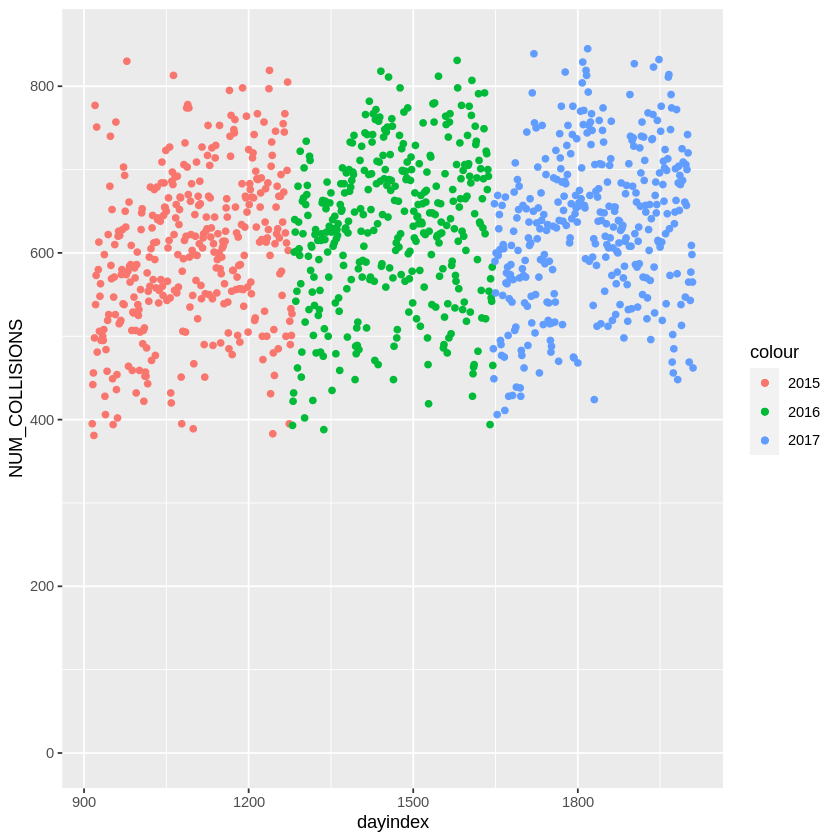

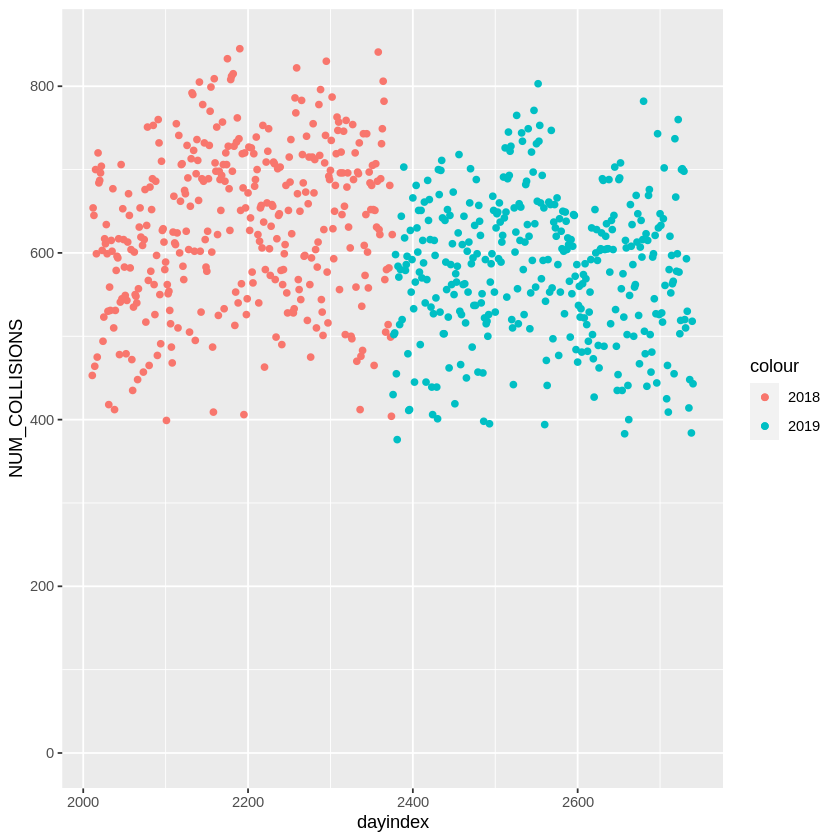

In [249]:
ggplot() +
  geom_point(data=cosc12c, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=cosc13c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14c, aes(dayindex, NUM_COLLISIONS, color="2014")) + ylim(0, 850)

ggplot() +
  geom_point(data=cosc15c, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cosc17c, aes(dayindex, NUM_COLLISIONS, color="2017")) + ylim(0, 850)

ggplot() +
  geom_point(data=cosc18c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19c, aes(dayindex, NUM_COLLISIONS, color="2019")) + ylim(0, 850)

Above are 3 further plots with the previous plot broken down into smaller sections.

As a second step, further outliers will be removed, specified for each year, to take account of the differences in the ranges across the years.

In [250]:
cosc12d <- cosc12c[which(cosc12c$NUM_COLLISIONS >= 380), ]
cosc13d <- cosc13c[which(cosc13c$NUM_COLLISIONS >= 390), ]
cosc14d <- cosc14c[which(cosc14c$NUM_COLLISIONS >= 380), ]
cosc15d <- cosc15c[which(cosc15c$NUM_COLLISIONS >= 390), ]
cosc16d <- cosc16c[which(cosc16c$NUM_COLLISIONS >= 430), ]
cosc17d <- cosc17c[which(cosc17c$NUM_COLLISIONS >= 430), ]
cosc18d <- cosc18c[which(cosc18c$NUM_COLLISIONS >= 430), ]
cosc19d <- cosc19c[which(cosc19c$NUM_COLLISIONS >= 400), ]
cosc12e <- cosc12d[which(cosc12d$NUM_COLLISIONS <= 720), ]
cosc13e <- cosc13d[which(cosc13d$NUM_COLLISIONS <= 720), ]
cosc14e <- cosc14d[which(cosc14d$NUM_COLLISIONS <= 750), ]
cosc15e <- cosc15d[which(cosc15d$NUM_COLLISIONS <= 800), ]
cosc16e <- cosc16d[which(cosc16d$NUM_COLLISIONS <= 820), ]
cosc17e <- cosc17d[which(cosc17d$NUM_COLLISIONS <= 840), ]
cosc18e <- cosc18d[which(cosc18d$NUM_COLLISIONS <= 840), ]
cosc19e <- cosc19d[which(cosc19d$NUM_COLLISIONS <= 760), ]

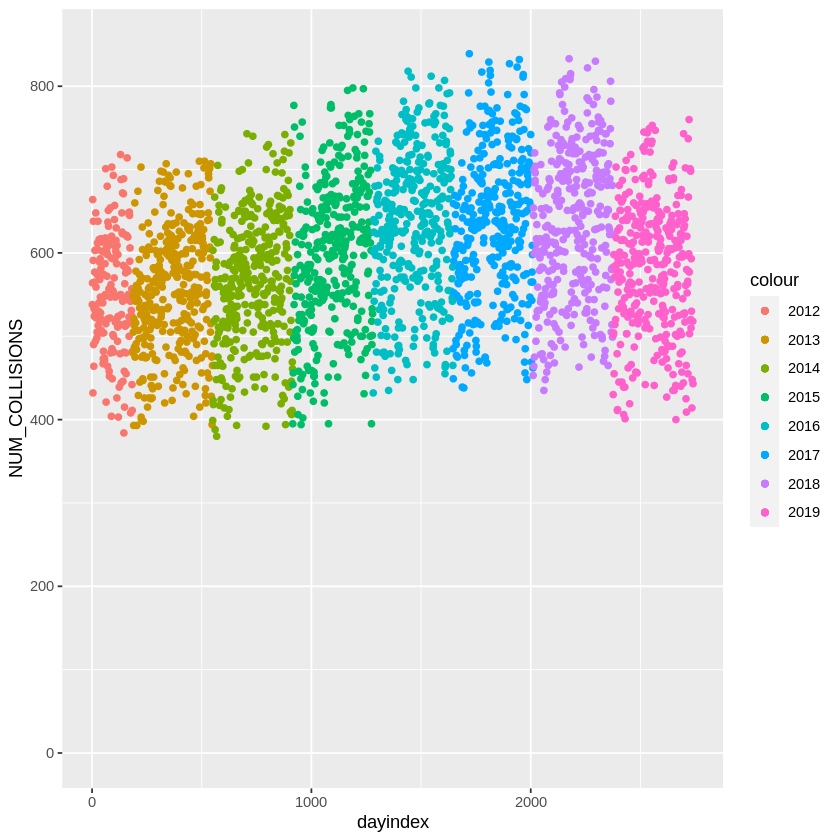

In [251]:
ggplot() +
  geom_point(data=cosc12e, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=cosc13e, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=cosc14e, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=cosc15e, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=cosc16e, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=cosc17e, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=cosc18e, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=cosc19e, aes(dayindex, NUM_COLLISIONS, color="2019")) + ylim(0, 850)

Above is another plot for 2012-2019, with the additional outliers removed. This smoothed-out plot makes the yearly increases, until the fall in 2019, more apparent.

### 3.6.5 Normalisation / standardisation

While it is sufficient to either normalise or standardise the data, it would be useful to consider both, just in case the outlier removal steps taken in 3.6.4 were large enough to distort the normalisation. Subsequently, both are undertaken below.

In [252]:
#Normalisation = (Number of collisions / Minimum no of collisions) / (Maximum no of collisions - Minimum no of collisions)
#Standardisation = (Number of collisions - Mean of collisions) / Standard deviation of collisions

#2012
cosc12e$norm <- (cosc12e$NUM_COLLISIONS-min(cosc12e$NUM_COLLISIONS))/(max(cosc12e$NUM_COLLISIONS)-min(cosc12e$NUM_COLLISIONS))
cosc12e$stan <- ((cosc12e$NUM_COLLISIONS - mean(cosc12e$NUM_COLLISIONS))/(sd(cosc12e$NUM_COLLISIONS)))

#2013
cosc13e$norm <- (cosc13e$NUM_COLLISIONS-min(cosc13e$NUM_COLLISIONS))/(max(cosc13e$NUM_COLLISIONS)-min(cosc13e$NUM_COLLISIONS))
cosc13e$stan <- ((cosc13e$NUM_COLLISIONS - mean(cosc13e$NUM_COLLISIONS))/(sd(cosc13e$NUM_COLLISIONS)))

#2014
cosc14e$norm <- (cosc14e$NUM_COLLISIONS-min(cosc14e$NUM_COLLISIONS))/(max(cosc14e$NUM_COLLISIONS)-min(cosc14e$NUM_COLLISIONS))
cosc14e$stan <- ((cosc14e$NUM_COLLISIONS - mean(cosc14e$NUM_COLLISIONS))/(sd(cosc14e$NUM_COLLISIONS)))

#2015
cosc15e$norm <- (cosc15e$NUM_COLLISIONS-min(cosc15e$NUM_COLLISIONS))/(max(cosc15e$NUM_COLLISIONS)-min(cosc15e$NUM_COLLISIONS))
cosc15e$stan <- ((cosc15e$NUM_COLLISIONS - mean(cosc15e$NUM_COLLISIONS))/(sd(cosc15e$NUM_COLLISIONS)))

#2016
cosc16e$norm <- (cosc16e$NUM_COLLISIONS-min(cosc16e$NUM_COLLISIONS))/(max(cosc16e$NUM_COLLISIONS)-min(cosc16e$NUM_COLLISIONS))
cosc16e$stan <- ((cosc16e$NUM_COLLISIONS - mean(cosc16e$NUM_COLLISIONS))/(sd(cosc16e$NUM_COLLISIONS)))

#2017
cosc17e$norm <- (cosc17e$NUM_COLLISIONS-min(cosc17e$NUM_COLLISIONS))/(max(cosc17e$NUM_COLLISIONS)-min(cosc17e$NUM_COLLISIONS))
cosc17e$stan <- ((cosc17e$NUM_COLLISIONS - mean(cosc17e$NUM_COLLISIONS))/(sd(cosc17e$NUM_COLLISIONS)))

#2018
cosc18e$norm <- (cosc18e$NUM_COLLISIONS-min(cosc18e$NUM_COLLISIONS))/(max(cosc18e$NUM_COLLISIONS)-min(cosc18e$NUM_COLLISIONS))
cosc18e$stan <- ((cosc18e$NUM_COLLISIONS - mean(cosc18e$NUM_COLLISIONS))/(sd(cosc18e$NUM_COLLISIONS)))

#2019
cosc19e$norm <- (cosc19e$NUM_COLLISIONS-min(cosc19e$NUM_COLLISIONS))/(max(cosc19e$NUM_COLLISIONS)-min(cosc19e$NUM_COLLISIONS))
cosc19e$stan <- ((cosc19e$NUM_COLLISIONS - mean(cosc19e$NUM_COLLISIONS))/(sd(cosc19e$NUM_COLLISIONS)))

#2020
#cosc20e$norm <- (cosc20e$NUM_COLLISIONS-min(cosc20e$NUM_COLLISIONS))/(max(cosc20e$NUM_COLLISIONS)-min(cosc20e$NUM_COLLISIONS))
#cosc20e$stan <- ((cosc20e$NUM_COLLISIONS - mean(cosc20e$NUM_COLLISIONS))/(sd(cosc20e$NUM_COLLISIONS)))

In [253]:
tail(cosc19e)

dayindex dayofyear day year mo da collision_date temp dewp slp    ⋯ mxpsd
2732 2732     357       3   2019 12 23 2019-12-23     44.3 38.3 1017.8 ⋯ 15.9 
2733 2733     358       4   2019 12 24 2019-12-24     42.8 33.7 1015.2 ⋯ 18.1 
2735 2735     360       6   2019 12 26 2019-12-26     35.9 30.3 1025.7 ⋯ 14.0 
2736 2736     361       7   2019 12 27 2019-12-27     40.1 35.0 1026.1 ⋯ 12.0 
2739 2739     364       3   2019 12 30 2019-12-30     39.6 36.3 1017.1 ⋯ 25.1 
2740 2740     365       4   2019 12 31 2019-12-31     44.7 42.6 1002.6 ⋯ 31.1 
     gust  max  min  prcp sndp  fog NUM_COLLISIONS norm       stan      
2732 999.9 50.0 37.9 0.00 999.9 0   593            0.53611111  0.1232268
2733  22.0 50.0 34.0 0.00 999.9 0   530            0.36111111 -0.6609212
2735 999.9 46.4 28.9 0.00 999.9 0   414            0.03888889 -2.1047493
2736 999.9 48.0 28.9 0.00 999.9 0   448            0.13333333 -1.6815583
2739  35.0 45.0 30.9 0.39 999.9 0   518            0.32777778 -0.8102827
2740  39.0 52.0 37.9 0.88 999.9 1   443            0.11944444 -1.7437923

The normalised and standardised values have been added as the end two columns in the dataset.

In [254]:
summary(cosc12e$norm)
summary(cosc13e$norm)
summary(cosc14e$norm)
summary(cosc15e$norm)
summary(cosc16e$norm)
summary(cosc17e$norm)
summary(cosc18e$norm)
summary(cosc19e$norm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3683  0.4970  0.5102  0.6647  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3557  0.5158  0.5146  0.6790  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3636  0.5207  0.5106  0.6667  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3564  0.5173  0.5063  0.6689  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3620  0.5311  0.5224  0.6865  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3317  0.4963  0.4871  0.6434  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3335  0.5138  0.5050  0.6809  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3500  0.5306  0.5086  0.6694  1.0000 

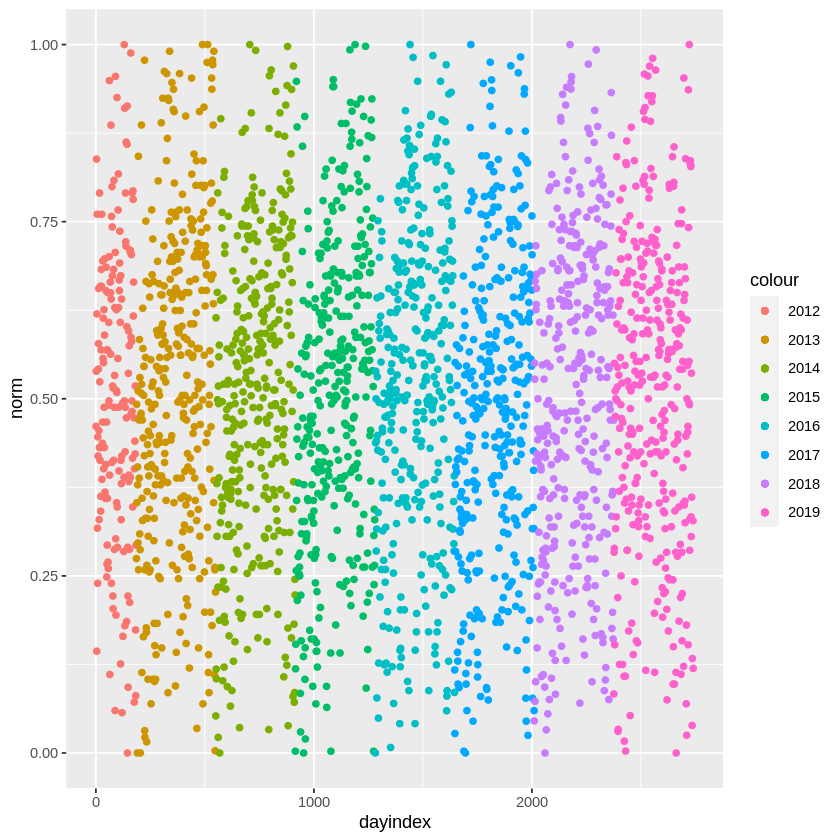

In [255]:
ggplot() +
  geom_point(data=cosc12e, aes(dayindex, norm, color="2012")) +
  geom_point(data=cosc13e, aes(dayindex, norm, color="2013")) +
  geom_point(data=cosc14e, aes(dayindex, norm, color="2014")) +
  geom_point(data=cosc15e, aes(dayindex, norm, color="2015")) +
  geom_point(data=cosc16e, aes(dayindex, norm, color="2016")) +
  geom_point(data=cosc17e, aes(dayindex, norm, color="2017")) +
  geom_point(data=cosc18e, aes(dayindex, norm, color="2018")) +
  geom_point(data=cosc19e, aes(dayindex, norm, color="2019"))  + ylim(0, 1)

The plot above shows the normalised values against day index.

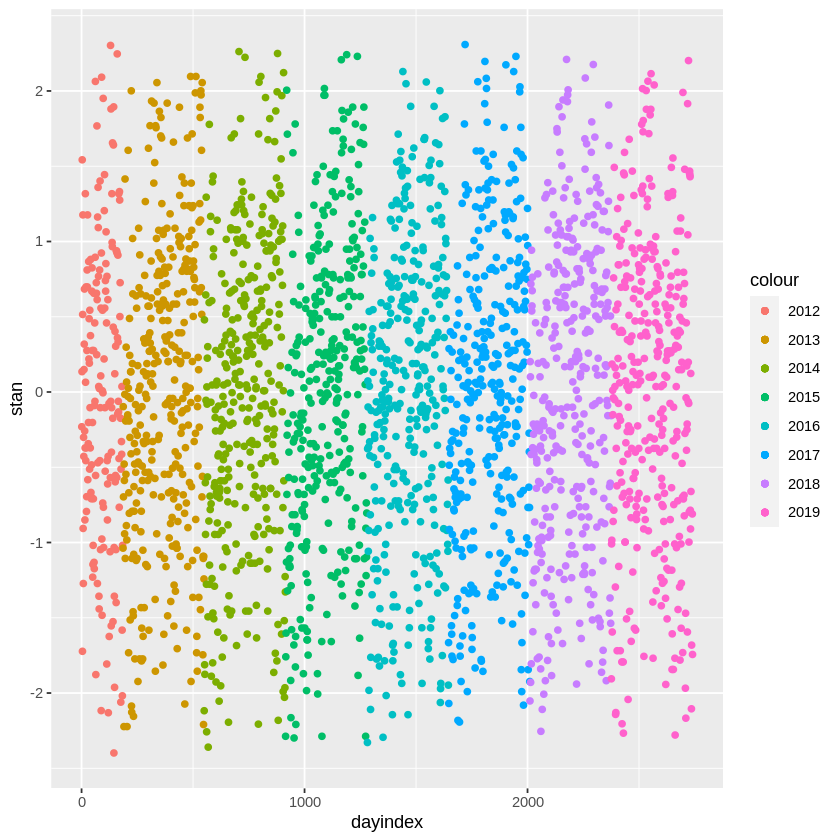

In [256]:
ggplot() +
  geom_point(data=cosc12e, aes(dayindex, stan, color="2012")) +
  geom_point(data=cosc13e, aes(dayindex, stan, color="2013")) +
  geom_point(data=cosc14e, aes(dayindex, stan, color="2014")) +
  geom_point(data=cosc15e, aes(dayindex, stan, color="2015")) +
  geom_point(data=cosc16e, aes(dayindex, stan, color="2016")) +
  geom_point(data=cosc17e, aes(dayindex, stan, color="2017")) +
  geom_point(data=cosc18e, aes(dayindex, stan, color="2018")) +
  geom_point(data=cosc19e, aes(dayindex, stan, color="2019"))

For comparison, the above plot shows the standardised values against day index. It appears very similar to the normalised plot above.

# 4 Conclusions

A number of steps were taken to analyse the relationship between weather and the number of vehicle collisions in New York City between 2012 and 2020.

Initial analysis showed that collision numbers tended to increase over the course of the weekdays, and were lower at the weekend. Collision numbers increased year on year, before falling in 2019, and then falling substantially lower with a very distorted pattern in 2020, owing to Covid and lockdowns. Seasonal variations were also apparent.

Consideration of the different weather factors showed positive correlations between collisions and temperature, and unsurprisingly then also with maximum temperature and minimum temperature. Dewpoint was also positive and promising in some years. Other correlations such as those with sea level pressure and visibility were mixed and small to near-negligible.

Seasonal patterns were considered and found to be more reliable and consistent in May/June than Oct/Nov, when considering day of the week or weather factors like temperature and dewpoint.

Day of the week data was reordered to create a more linear relationship with collision numbers, and with it stronger correlations. Outliers were removed, and finally normalised and standardised values were produced.

*word count: 3342*

# References

NOAA. (2022). *bigquery-public-data.noaa_gsod*. [Dataset]. https://console.cloud.google.com/bigquery

NYPD. (2023). *bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions*. [Dataset]. https://console.cloud.google.com/bigquery